In [ ]:
# Pandas
import pandas as pd
import numpy as np

# Seaborn
import seaborn as sns

#Matplotlib
import matplotlib.pyplot as plt

# Scikit-learn
from sklearn import svm, tree
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
import itertools

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("display.width", None)
pd.set_option("display.min_rows", 30)
pd.set_option("display.max_rows", 100)

sns.set(rc = {'figure.figsize':(12,10)})
sns.set(font_scale=0.9)

In [ ]:
mortalita = pd.read_csv("sample_data/Mortalit__per_causa_di_morte.csv", sep=",")
cond_salute = pd.read_csv("sample_data/Dataset_condizioni_di_salute_per_provincia_e_genere.csv", sep=",")
infettive = pd.read_csv("sample_data/Malattie_infettive_Tassi_Regione_Lombardia_per_sesso_e_et_.csv", sep=",")

# 1) Dataset Mortalità

In [ ]:
mortalita = mortalita.rename(columns={'GRUPPO CAUSA DI MORTE': 'GRUPPOMORTE', 'NUMERO DECESSI POPOLAZIONE': 'DECESSI', 'CAUSA DI MORTE':'CAUSAMORTE'})
mortalita=mortalita.drop(["COORDINATA X"], axis=1)
mortalita=mortalita.drop(["COORDINATA Y"], axis=1)
mortalita=mortalita.drop(["POSIZIONE"], axis=1)
#rinomino per comodità alcune variabili, e cancello quelle che non servono

In [ ]:
print(mortalita.isnull().sum())
mortalita.drop(mortalita[mortalita["DECESSI"].isnull()].index, inplace=True) #cancello le righe vuote dei decessi

ANNO           0
PROVINCIA      0
GENERE         0
GRUPPOMORTE    0
CAUSAMORTE     0
DECESSI        0
dtype: int64


## Italia

Il primo dataset sulla Mortalità prende in esame gli anni dal 2012 al 2015; il secondo sulle condizioni di salute dal 2012 al 2016; mentre il terzo sulle malattie infettive dal 2008 al 2018.



In [ ]:
a12_IT_DEC=mortalita[(mortalita['ANNO'] == 2012) & (mortalita['PROVINCIA'] == "ITALIA")] #ho dato dei nomi parlanti alle variabili: anno e provincia, con l'aggiunta di m o f per il genere
a13_IT_DEC=mortalita[(mortalita['ANNO'] == 2013) & (mortalita['PROVINCIA'] == "ITALIA")]
a14_IT_DEC=mortalita[(mortalita['ANNO'] == 2014) & (mortalita['PROVINCIA'] == "ITALIA")]
a15_IT_DEC=mortalita[(mortalita['ANNO'] == 2015) & (mortalita['PROVINCIA'] == "ITALIA")]

Esploro i dati per anno in Italia

In [ ]:
print("i morti totali nel 2012 sono ", a12_IT_DEC.DECESSI.sum())
a12_IT_DECm=a12_IT_DEC[(a12_IT_DEC['GENERE'] == "M")]
print("Di cui i maschi:", a12_IT_DECm.DECESSI.sum())
a12_IT_DECf=a12_IT_DEC[(a12_IT_DEC['GENERE'] == "F")]
print("e ", a12_IT_DECf.DECESSI.sum(), " femmine")


i morti totali nel 2012 sono  609896.0
Di cui i maschi: 293425.0
e  316471.0  femmine


In [ ]:
print("i morti totali nel 2013 sono ", a13_IT_DEC.DECESSI.sum())
a13_IT_DECm=a13_IT_DEC[(a13_IT_DEC['GENERE'] == "M")]
print("Di cui i maschi:", a13_IT_DECm.DECESSI.sum())
a13_IT_DECf=a13_IT_DEC[(a13_IT_DEC['GENERE'] == "F")]
print("e ", a13_IT_DECf.DECESSI.sum(), " femmine")

i morti totali nel 2013 sono  595948.0
Di cui i maschi: 287887.0
e  308061.0  femmine


In [ ]:
print("i morti totali nel 2014 sono ", a14_IT_DEC.DECESSI.sum())
a14_IT_DECm=a14_IT_DEC[(a14_IT_DEC['GENERE'] == "M")]
print("Di cui i maschi:", a14_IT_DECm.DECESSI.sum())
a14_IT_DECf=a14_IT_DEC[(a14_IT_DEC['GENERE'] == "F")]
print("e ", a14_IT_DECf.DECESSI.sum(), " femmine")

i morti totali nel 2014 sono  595293.0
Di cui i maschi: 287508.0
e  307785.0  femmine


In [ ]:
print("i morti totali nel 2015 sono ", a15_IT_DEC.DECESSI.sum())
a15_IT_DECm=a15_IT_DEC[(a15_IT_DEC['GENERE'] == "M")]
print("Di cui i maschi:", a15_IT_DECm.DECESSI.sum())
a15_IT_DECf=a15_IT_DEC[(a15_IT_DEC['GENERE'] == "F")]
print("e ", a15_IT_DECf.DECESSI.sum(), " femmine")

i morti totali nel 2015 sono  642459.0
Di cui i maschi: 305020.0
e  337439.0  femmine


## Regione Lombardia

In [ ]:
a12_RL_DEC=mortalita[(mortalita['ANNO'] == 2012) & (mortalita['PROVINCIA'] == "REGIONE LOMBARDIA")]
a13_RL_DEC=mortalita[(mortalita['ANNO'] == 2013) & (mortalita['PROVINCIA'] == "REGIONE LOMBARDIA")]
a14_RL_DEC=mortalita[(mortalita['ANNO'] == 2014) & (mortalita['PROVINCIA'] == "REGIONE LOMBARDIA")]
a15_RL_DEC=mortalita[(mortalita['ANNO'] == 2015) & (mortalita['PROVINCIA'] == "REGIONE LOMBARDIA")]

In [ ]:
print("i morti totali in regione Lombardia nel 2012 sono ", a12_RL_DEC.DECESSI.sum())
a12_RL_DECm=a12_RL_DEC[(a12_RL_DEC['GENERE'] == "M")]
print("Di cui i maschi:", a12_RL_DECm.DECESSI.sum())
a12_RL_DECf=a12_RL_DEC[(a12_RL_DEC['GENERE'] == "F")]
print("e ", a12_RL_DECf.DECESSI.sum(), " femmine")

i morti totali in regione Lombardia nel 2012 sono  92939.0
Di cui i maschi: 43947.0
e  48992.0  femmine


In [ ]:
print("i morti totali in regione Lombardia nel 2013 sono ", a13_RL_DEC.DECESSI.sum())
a13_RL_DECm=a13_RL_DEC[(a13_RL_DEC['GENERE'] == "M")]
print("Di cui i maschi:", a13_RL_DECm.DECESSI.sum())
a13_RL_DECf=a13_RL_DEC[(a13_RL_DEC['GENERE'] == "F")]
print("e ", a13_RL_DECf.DECESSI.sum(), " femmine")

i morti totali in regione Lombardia nel 2013 sono  90648.0
Di cui i maschi: 43004.0
e  47644.0  femmine


In [ ]:
print("i morti totali in regione Lombardia nel 2014 sono ", a14_RL_DEC.DECESSI.sum())
a14_RL_DECm=a14_RL_DEC[(a14_RL_DEC['GENERE'] == "M")]
print("Di cui i maschi:", a14_RL_DECm.DECESSI.sum())
a14_RL_DECf=a14_RL_DEC[(a14_RL_DEC['GENERE'] == "F")]
print("e ", a14_RL_DECf.DECESSI.sum(), " femmine")

i morti totali in regione Lombardia nel 2014 sono  90829.0
Di cui i maschi: 43052.0
e  47777.0  femmine


In [ ]:
print("i morti totali in regione Lombardia nel 2014 sono ", a15_RL_DEC.DECESSI.sum())
a15_RL_DECm=a15_RL_DEC[(a15_RL_DEC['GENERE'] == "M")]
print("Di cui i maschi:", a15_RL_DECm.DECESSI.sum())
a15_RL_DECf=a15_RL_DEC[(a15_RL_DEC['GENERE'] == "F")]
print("e ", a15_RL_DECf.DECESSI.sum(), " femmine")

i morti totali in regione Lombardia nel 2014 sono  98211.0
Di cui i maschi: 45859.0
e  52352.0  femmine


Panoramica dei dati emersi.

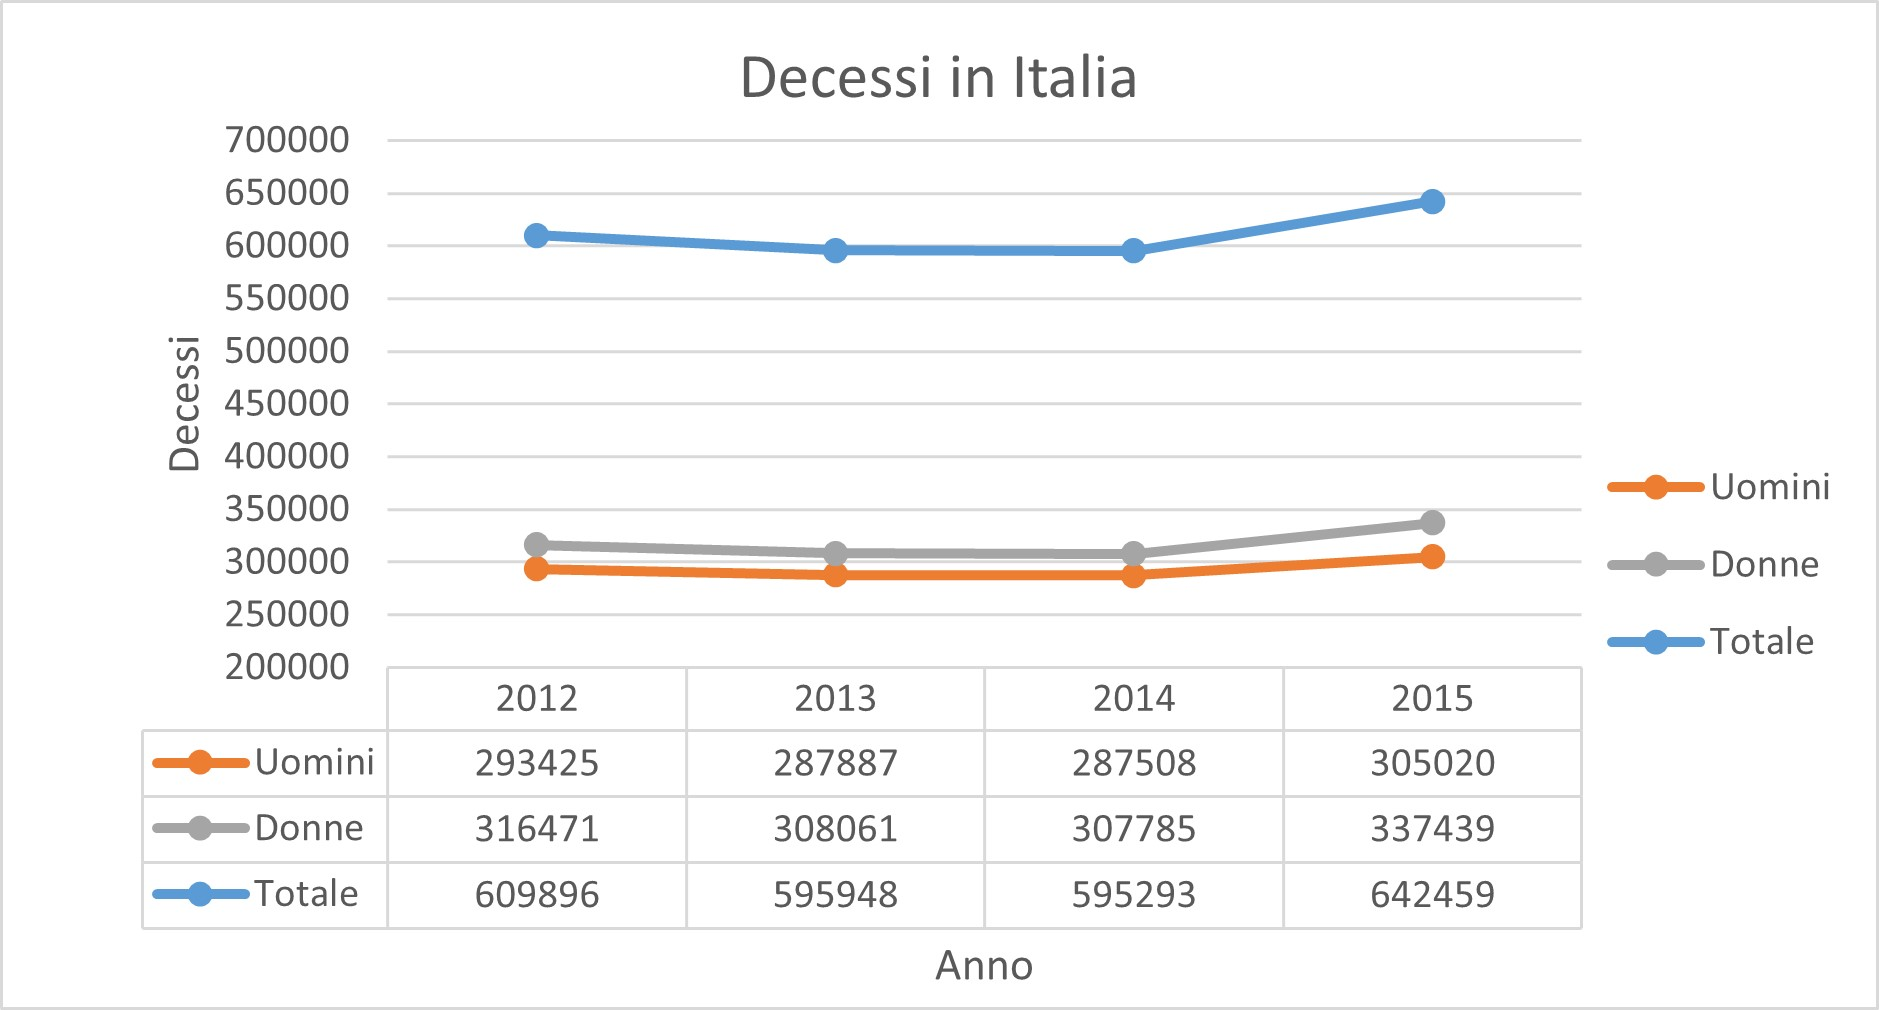

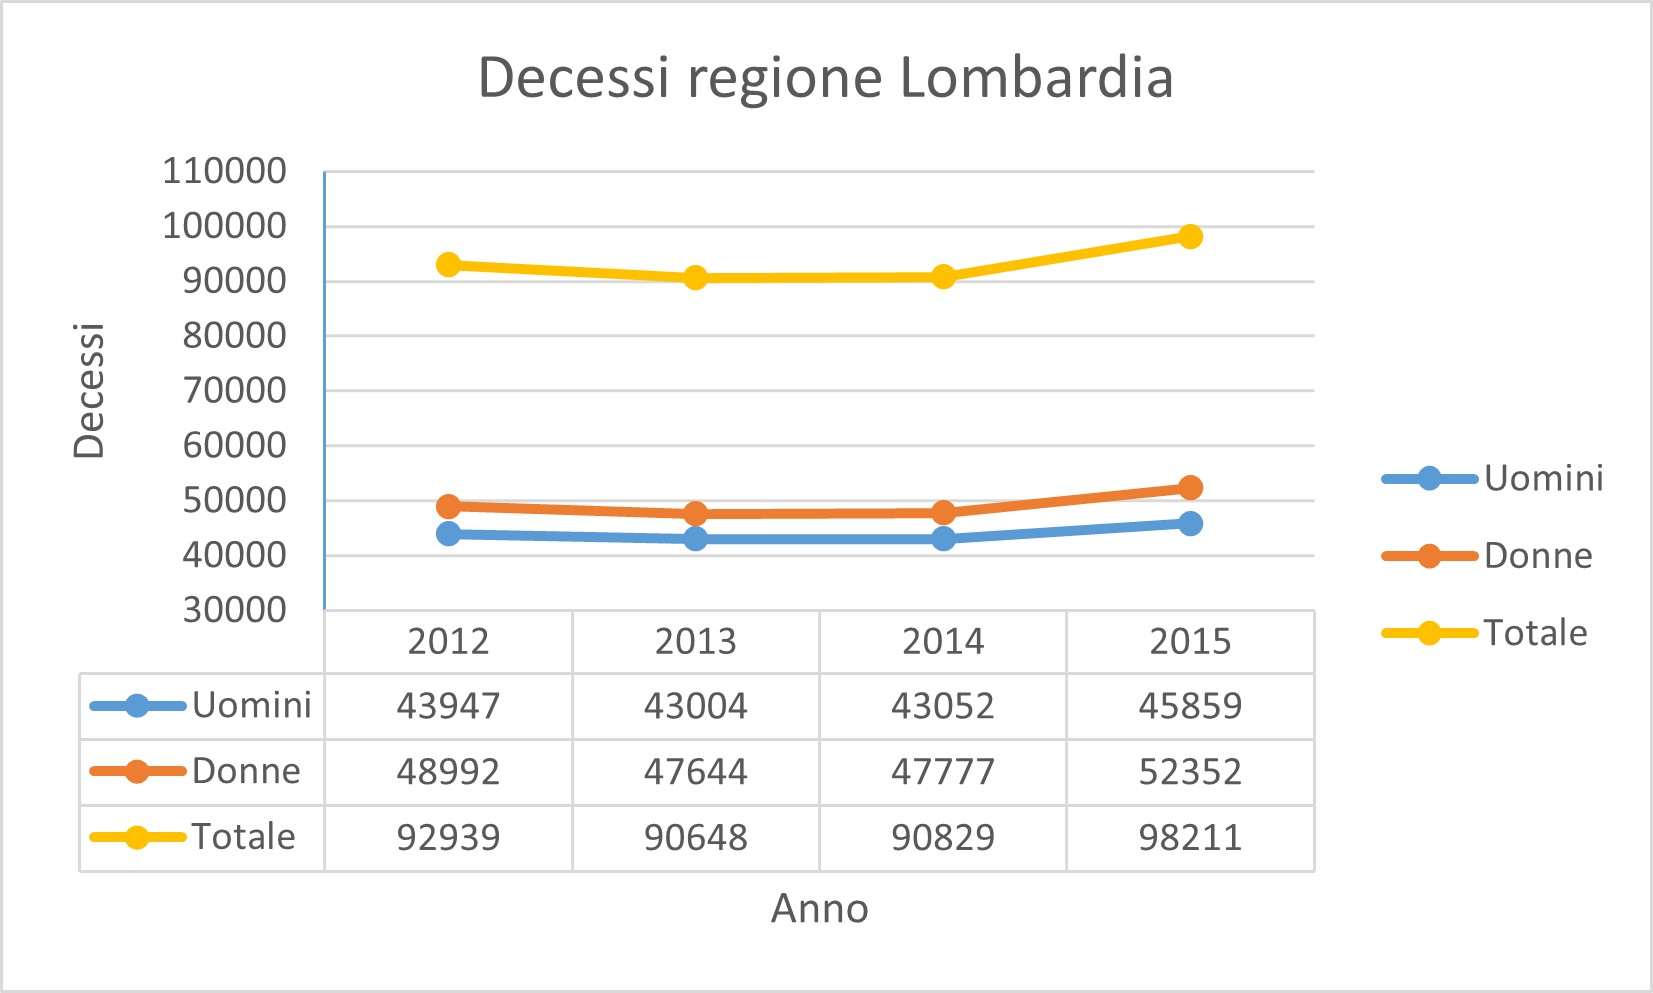

##Gruppo Cause di morte

In [ ]:
gruppomorte=["Tumori", "Cause esterne di traumatismo e avvelenamento", "Malattie del sistema circolatorio",
             "Malattie del sistema respiratorio", "Alcune malattie infettive e parassitarie",
             "Disturbi psichici e comportamentali", "Malattie dell'apparato digerente", "Sintomi, segni, risultati anomali e cause mal definite",
             "Malattie del sistema nervoso e degli organi di senso", "Malattie dell'apparato genitourinario",
             "Malattie del sistema osteomuscolare e del tessuto connettivo", "Malattie endocrine, nutrizionali e metaboliche",
             "Complicazioni della gravidanza, del parto e del puerperio", "Malformazioni congenite ed anomalie cromosomiche",
             "Malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario",
             "Alcune condizioni morbose che hanno origine nel periodo perinatale", "Malattie della cute e del tessuto sottocutaneo"]

print("Nel 2012 in Italia, queste sono le cause di morte per le donne sul totale: \n")
for a in gruppomorte:
  a12_IT_DECfx=mortalita[(mortalita['ANNO'] == 2012) & (mortalita['PROVINCIA'] == "ITALIA") & (mortalita['GENERE'] == "F") &
                         (mortalita['GRUPPOMORTE']==a)]
  print("Per il gruppo:", a, "-->l'incidenza sul totale è stata", round((a12_IT_DECfx.DECESSI.sum()/316471)*100,2), "%")



Nel 2012 in Italia, queste sono le cause di morte per le donne sul totale: 

Per il gruppo: Tumori -->l'incidenza sul totale è stata 24.41 %
Per il gruppo: Cause esterne di traumatismo e avvelenamento -->l'incidenza sul totale è stata 3.11 %
Per il gruppo: Malattie del sistema circolatorio -->l'incidenza sul totale è stata 41.1 %
Per il gruppo: Malattie del sistema respiratorio -->l'incidenza sul totale è stata 6.26 %
Per il gruppo: Alcune malattie infettive e parassitarie -->l'incidenza sul totale è stata 2.01 %
Per il gruppo: Disturbi psichici e comportamentali -->l'incidenza sul totale è stata 3.71 %
Per il gruppo: Malattie dell'apparato digerente -->l'incidenza sul totale è stata 3.75 %
Per il gruppo: Sintomi, segni, risultati anomali e cause mal definite -->l'incidenza sul totale è stata 2.19 %
Per il gruppo: Malattie del sistema nervoso e degli organi di senso -->l'incidenza sul totale è stata 4.61 %
Per il gruppo: Malattie dell'apparato genitourinario -->l'incidenza sul totale è

In Italia nel 2012 la causa più ricorrente di morte femminile sono state malattie del sistema circolatorio (41,1%), e al secondo posti i tumori (24,41%)

In [ ]:
gruppomorte=["Tumori", "Cause esterne di traumatismo e avvelenamento", "Malattie del sistema circolatorio",
             "Malattie del sistema respiratorio", "Alcune malattie infettive e parassitarie",
             "Disturbi psichici e comportamentali", "Malattie dell'apparato digerente", "Sintomi, segni, risultati anomali e cause mal definite",
             "Malattie del sistema nervoso e degli organi di senso", "Malattie dell'apparato genitourinario",
             "Malattie del sistema osteomuscolare e del tessuto connettivo", "Malattie endocrine, nutrizionali e metaboliche",
             "Complicazioni della gravidanza, del parto e del puerperio", "Malformazioni congenite ed anomalie cromosomiche",
             "Malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario",
             "Alcune condizioni morbose che hanno origine nel periodo perinatale", "Malattie della cute e del tessuto sottocutaneo"]

print("Nel 2013 in Italia, queste sono le cause di morte per le donne sul totale: \n")
for a in gruppomorte:
  a13_IT_DECfx=mortalita[(mortalita['ANNO'] == 2013) & (mortalita['PROVINCIA'] == "ITALIA") & (mortalita['GENERE'] == "F") &
                         (mortalita['GRUPPOMORTE']==a)]
  print("Per il gruppo:", a, "-->l'incidenza sul totale è stata", round((a13_IT_DECfx.DECESSI.sum()/308061)*100,2), "%")



Nel 2013 in Italia, queste sono le cause di morte per le donne sul totale: 

Per il gruppo: Tumori -->l'incidenza sul totale è stata 25.04 %
Per il gruppo: Cause esterne di traumatismo e avvelenamento -->l'incidenza sul totale è stata 3.14 %
Per il gruppo: Malattie del sistema circolatorio -->l'incidenza sul totale è stata 40.47 %
Per il gruppo: Malattie del sistema respiratorio -->l'incidenza sul totale è stata 6.22 %
Per il gruppo: Alcune malattie infettive e parassitarie -->l'incidenza sul totale è stata 2.13 %
Per il gruppo: Disturbi psichici e comportamentali -->l'incidenza sul totale è stata 3.79 %
Per il gruppo: Malattie dell'apparato digerente -->l'incidenza sul totale è stata 3.76 %
Per il gruppo: Sintomi, segni, risultati anomali e cause mal definite -->l'incidenza sul totale è stata 2.2 %
Per il gruppo: Malattie del sistema nervoso e degli organi di senso -->l'incidenza sul totale è stata 4.46 %
Per il gruppo: Malattie dell'apparato genitourinario -->l'incidenza sul totale è

nel 2013 malattie sistema circolatorio 40.47% e tumori 25.04%

In [ ]:
gruppomorte=["Tumori", "Cause esterne di traumatismo e avvelenamento", "Malattie del sistema circolatorio",
             "Malattie del sistema respiratorio", "Alcune malattie infettive e parassitarie",
             "Disturbi psichici e comportamentali", "Malattie dell'apparato digerente", "Sintomi, segni, risultati anomali e cause mal definite",
             "Malattie del sistema nervoso e degli organi di senso", "Malattie dell'apparato genitourinario",
             "Malattie del sistema osteomuscolare e del tessuto connettivo", "Malattie endocrine, nutrizionali e metaboliche",
             "Complicazioni della gravidanza, del parto e del puerperio", "Malformazioni congenite ed anomalie cromosomiche",
             "Malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario",
             "Alcune condizioni morbose che hanno origine nel periodo perinatale", "Malattie della cute e del tessuto sottocutaneo"]

print("Nel 2014 in Italia, queste sono le cause di morte per le donne sul totale: \n")
for a in gruppomorte:
  a14_IT_DECfx=mortalita[(mortalita['ANNO'] == 2014) & (mortalita['PROVINCIA'] == "ITALIA") & (mortalita['GENERE'] == "F") &
                         (mortalita['GRUPPOMORTE']==a)]
  print("Per il gruppo:", a, "-->l'incidenza sul totale è stata", round((a14_IT_DECfx.DECESSI.sum()/307785)*100,2), "%")


Nel 2014 in Italia, queste sono le cause di morte per le donne sul totale: 

Per il gruppo: Tumori -->l'incidenza sul totale è stata 25.23 %
Per il gruppo: Cause esterne di traumatismo e avvelenamento -->l'incidenza sul totale è stata 3.1 %
Per il gruppo: Malattie del sistema circolatorio -->l'incidenza sul totale è stata 40.2 %
Per il gruppo: Malattie del sistema respiratorio -->l'incidenza sul totale è stata 6.16 %
Per il gruppo: Alcune malattie infettive e parassitarie -->l'incidenza sul totale è stata 2.21 %
Per il gruppo: Disturbi psichici e comportamentali -->l'incidenza sul totale è stata 3.78 %
Per il gruppo: Malattie dell'apparato digerente -->l'incidenza sul totale è stata 3.7 %
Per il gruppo: Sintomi, segni, risultati anomali e cause mal definite -->l'incidenza sul totale è stata 2.35 %
Per il gruppo: Malattie del sistema nervoso e degli organi di senso -->l'incidenza sul totale è stata 4.58 %
Per il gruppo: Malattie dell'apparato genitourinario -->l'incidenza sul totale è s

nel 2014 circolatorio 40,2, tumori 25,23

In [ ]:
gruppomorte=["Tumori", "Cause esterne di traumatismo e avvelenamento", "Malattie del sistema circolatorio",
             "Malattie del sistema respiratorio", "Alcune malattie infettive e parassitarie",
             "Disturbi psichici e comportamentali", "Malattie dell'apparato digerente", "Sintomi, segni, risultati anomali e cause mal definite",
             "Malattie del sistema nervoso e degli organi di senso", "Malattie dell'apparato genitourinario",
             "Malattie del sistema osteomuscolare e del tessuto connettivo", "Malattie endocrine, nutrizionali e metaboliche",
             "Complicazioni della gravidanza, del parto e del puerperio", "Malformazioni congenite ed anomalie cromosomiche",
             "Malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario",
             "Alcune condizioni morbose che hanno origine nel periodo perinatale", "Malattie della cute e del tessuto sottocutaneo"]

print("Nel 2015 in Italia, queste sono le cause di morte per le donne sul totale: \n")
for a in gruppomorte:
  a15_IT_DECfx=mortalita[(mortalita['ANNO'] == 2015) & (mortalita['PROVINCIA'] == "ITALIA") & (mortalita['GENERE'] == "F") &
                         (mortalita['GRUPPOMORTE']==a)]
  print("Per il gruppo:", a, "-->l'incidenza sul totale è stata", round((a15_IT_DECfx.DECESSI.sum()/337439)*100,2), "%")

Nel 2015 in Italia, queste sono le cause di morte per le donne sul totale: 

Per il gruppo: Tumori -->l'incidenza sul totale è stata 23.47 %
Per il gruppo: Cause esterne di traumatismo e avvelenamento -->l'incidenza sul totale è stata 2.99 %
Per il gruppo: Malattie del sistema circolatorio -->l'incidenza sul totale è stata 40.25 %
Per il gruppo: Malattie del sistema respiratorio -->l'incidenza sul totale è stata 6.8 %
Per il gruppo: Alcune malattie infettive e parassitarie -->l'incidenza sul totale è stata 2.48 %
Per il gruppo: Disturbi psichici e comportamentali -->l'incidenza sul totale è stata 4.27 %
Per il gruppo: Malattie dell'apparato digerente -->l'incidenza sul totale è stata 3.5 %
Per il gruppo: Sintomi, segni, risultati anomali e cause mal definite -->l'incidenza sul totale è stata 2.51 %
Per il gruppo: Malattie del sistema nervoso e degli organi di senso -->l'incidenza sul totale è stata 4.81 %
Per il gruppo: Malattie dell'apparato genitourinario -->l'incidenza sul totale è 

nel 2015 circolatorio 40,25%% tumori 23,47% FINE F
_____________________________________________________________
---



INIZIO M

In [ ]:
gruppomorte=["Tumori", "Cause esterne di traumatismo e avvelenamento", "Malattie del sistema circolatorio",
             "Malattie del sistema respiratorio", "Alcune malattie infettive e parassitarie",
             "Disturbi psichici e comportamentali", "Malattie dell'apparato digerente", "Sintomi, segni, risultati anomali e cause mal definite",
             "Malattie del sistema nervoso e degli organi di senso", "Malattie dell'apparato genitourinario",
             "Malattie del sistema osteomuscolare e del tessuto connettivo", "Malattie endocrine, nutrizionali e metaboliche",
             "Complicazioni della gravidanza, del parto e del puerperio", "Malformazioni congenite ed anomalie cromosomiche",
             "Malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario",
             "Alcune condizioni morbose che hanno origine nel periodo perinatale", "Malattie della cute e del tessuto sottocutaneo"]

print("Nel 2012 in Italia, queste sono le cause di morte per gli uomini sul totale: \n")
for a in gruppomorte:
  a12_IT_DECmx=mortalita[(mortalita['ANNO'] == 2012) & (mortalita['PROVINCIA'] == "ITALIA") & (mortalita['GENERE'] == "M") &
                         (mortalita['GRUPPOMORTE']==a)]
  print("Per il gruppo:", a, "-->l'incidenza sul totale è stata", round((a12_IT_DECmx.DECESSI.sum()/293425)*100,2), "%")

Nel 2012 in Italia, queste sono le cause di morte per gli uomini sul totale: 

Per il gruppo: Tumori -->l'incidenza sul totale è stata 33.86 %
Per il gruppo: Cause esterne di traumatismo e avvelenamento -->l'incidenza sul totale è stata 4.51 %
Per il gruppo: Malattie del sistema circolatorio -->l'incidenza sul totale è stata 33.7 %
Per il gruppo: Malattie del sistema respiratorio -->l'incidenza sul totale è stata 8.01 %
Per il gruppo: Alcune malattie infettive e parassitarie -->l'incidenza sul totale è stata 2.08 %
Per il gruppo: Disturbi psichici e comportamentali -->l'incidenza sul totale è stata 1.9 %
Per il gruppo: Malattie dell'apparato digerente -->l'incidenza sul totale è stata 3.88 %
Per il gruppo: Sintomi, segni, risultati anomali e cause mal definite -->l'incidenza sul totale è stata 1.39 %
Per il gruppo: Malattie del sistema nervoso e degli organi di senso -->l'incidenza sul totale è stata 3.53 %
Per il gruppo: Malattie dell'apparato genitourinario -->l'incidenza sul totale 

2012 tumori 33,86 e circolatorio 33,7

In [ ]:
gruppomorte=["Tumori", "Cause esterne di traumatismo e avvelenamento", "Malattie del sistema circolatorio",
             "Malattie del sistema respiratorio", "Alcune malattie infettive e parassitarie",
             "Disturbi psichici e comportamentali", "Malattie dell'apparato digerente", "Sintomi, segni, risultati anomali e cause mal definite",
             "Malattie del sistema nervoso e degli organi di senso", "Malattie dell'apparato genitourinario",
             "Malattie del sistema osteomuscolare e del tessuto connettivo", "Malattie endocrine, nutrizionali e metaboliche",
             "Complicazioni della gravidanza, del parto e del puerperio", "Malformazioni congenite ed anomalie cromosomiche",
             "Malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario",
             "Alcune condizioni morbose che hanno origine nel periodo perinatale", "Malattie della cute e del tessuto sottocutaneo"]

print("Nel 2013 in Italia, queste sono le cause di morte per gli uomini sul totale: \n")
for a in gruppomorte:
  a13_IT_DECmx=mortalita[(mortalita['ANNO'] == 2013) & (mortalita['PROVINCIA'] == "ITALIA") & (mortalita['GENERE'] == "M") &
                         (mortalita['GRUPPOMORTE']==a)]
  print("Per il gruppo:", a, "-->l'incidenza sul totale è stata", round((a13_IT_DECmx.DECESSI.sum()/287887)*100,2), "%")

Nel 2013 in Italia, queste sono le cause di morte per gli uomini sul totale: 

Per il gruppo: Tumori -->l'incidenza sul totale è stata 34.2 %
Per il gruppo: Cause esterne di traumatismo e avvelenamento -->l'incidenza sul totale è stata 4.45 %
Per il gruppo: Malattie del sistema circolatorio -->l'incidenza sul totale è stata 33.52 %
Per il gruppo: Malattie del sistema respiratorio -->l'incidenza sul totale è stata 7.78 %
Per il gruppo: Alcune malattie infettive e parassitarie -->l'incidenza sul totale è stata 2.13 %
Per il gruppo: Disturbi psichici e comportamentali -->l'incidenza sul totale è stata 1.97 %
Per il gruppo: Malattie dell'apparato digerente -->l'incidenza sul totale è stata 3.81 %
Per il gruppo: Sintomi, segni, risultati anomali e cause mal definite -->l'incidenza sul totale è stata 1.42 %
Per il gruppo: Malattie del sistema nervoso e degli organi di senso -->l'incidenza sul totale è stata 3.57 %
Per il gruppo: Malattie dell'apparato genitourinario -->l'incidenza sul totale

2013 tumori 34,2 e circolatorio 33,52

In [ ]:
gruppomorte=["Tumori", "Cause esterne di traumatismo e avvelenamento", "Malattie del sistema circolatorio",
             "Malattie del sistema respiratorio", "Alcune malattie infettive e parassitarie",
             "Disturbi psichici e comportamentali", "Malattie dell'apparato digerente", "Sintomi, segni, risultati anomali e cause mal definite",
             "Malattie del sistema nervoso e degli organi di senso", "Malattie dell'apparato genitourinario",
             "Malattie del sistema osteomuscolare e del tessuto connettivo", "Malattie endocrine, nutrizionali e metaboliche",
             "Complicazioni della gravidanza, del parto e del puerperio", "Malformazioni congenite ed anomalie cromosomiche",
             "Malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario",
             "Alcune condizioni morbose che hanno origine nel periodo perinatale", "Malattie della cute e del tessuto sottocutaneo"]

print("Nel 2014 in Italia, queste sono le cause di morte per gli uomini sul totale: \n")
for a in gruppomorte:
  a14_IT_DECmx=mortalita[(mortalita['ANNO'] == 2014) & (mortalita['PROVINCIA'] == "ITALIA") & (mortalita['GENERE'] == "M") &
                         (mortalita['GRUPPOMORTE']==a)]
  print("Per il gruppo:", a, "-->l'incidenza sul totale è stata", round((a14_IT_DECmx.DECESSI.sum()/287508)*100,2), "%")

Nel 2014 in Italia, queste sono le cause di morte per gli uomini sul totale: 

Per il gruppo: Tumori -->l'incidenza sul totale è stata 34.44 %
Per il gruppo: Cause esterne di traumatismo e avvelenamento -->l'incidenza sul totale è stata 4.43 %
Per il gruppo: Malattie del sistema circolatorio -->l'incidenza sul totale è stata 33.15 %
Per il gruppo: Malattie del sistema respiratorio -->l'incidenza sul totale è stata 7.8 %
Per il gruppo: Alcune malattie infettive e parassitarie -->l'incidenza sul totale è stata 2.19 %
Per il gruppo: Disturbi psichici e comportamentali -->l'incidenza sul totale è stata 2.06 %
Per il gruppo: Malattie dell'apparato digerente -->l'incidenza sul totale è stata 3.82 %
Per il gruppo: Sintomi, segni, risultati anomali e cause mal definite -->l'incidenza sul totale è stata 1.42 %
Per il gruppo: Malattie del sistema nervoso e degli organi di senso -->l'incidenza sul totale è stata 3.59 %
Per il gruppo: Malattie dell'apparato genitourinario -->l'incidenza sul totale

2014 tumori 34,44 e circolatorio 33,15

In [ ]:
gruppomorte=["Tumori", "Cause esterne di traumatismo e avvelenamento", "Malattie del sistema circolatorio",
             "Malattie del sistema respiratorio", "Alcune malattie infettive e parassitarie",
             "Disturbi psichici e comportamentali", "Malattie dell'apparato digerente", "Sintomi, segni, risultati anomali e cause mal definite",
             "Malattie del sistema nervoso e degli organi di senso", "Malattie dell'apparato genitourinario",
             "Malattie del sistema osteomuscolare e del tessuto connettivo", "Malattie endocrine, nutrizionali e metaboliche",
             "Complicazioni della gravidanza, del parto e del puerperio", "Malformazioni congenite ed anomalie cromosomiche",
             "Malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario",
             "Alcune condizioni morbose che hanno origine nel periodo perinatale", "Malattie della cute e del tessuto sottocutaneo"]

print("Nel 2015 in Italia, queste sono le cause di morte per gli uomini sul totale: \n")
for a in gruppomorte:
  a15_IT_DECmx=mortalita[(mortalita['ANNO'] == 2015) & (mortalita['PROVINCIA'] == "ITALIA") & (mortalita['GENERE'] == "M") &
                         (mortalita['GRUPPOMORTE']==a)]
  print("Per il gruppo:", a, "-->l'incidenza sul totale è stata", round((a15_IT_DECmx.DECESSI.sum()/305020)*100,2), "%")

Nel 2015 in Italia, queste sono le cause di morte per gli uomini sul totale: 

Per il gruppo: Tumori -->l'incidenza sul totale è stata 32.47 %
Per il gruppo: Cause esterne di traumatismo e avvelenamento -->l'incidenza sul totale è stata 4.33 %
Per il gruppo: Malattie del sistema circolatorio -->l'incidenza sul totale è stata 33.58 %
Per il gruppo: Malattie del sistema respiratorio -->l'incidenza sul totale è stata 8.33 %
Per il gruppo: Alcune malattie infettive e parassitarie -->l'incidenza sul totale è stata 2.4 %
Per il gruppo: Disturbi psichici e comportamentali -->l'incidenza sul totale è stata 2.27 %
Per il gruppo: Malattie dell'apparato digerente -->l'incidenza sul totale è stata 3.71 %
Per il gruppo: Sintomi, segni, risultati anomali e cause mal definite -->l'incidenza sul totale è stata 1.57 %
Per il gruppo: Malattie del sistema nervoso e degli organi di senso -->l'incidenza sul totale è stata 3.9 %
Per il gruppo: Malattie dell'apparato genitourinario -->l'incidenza sul totale 

2015 circolatorio 33,58 e tumori 32,47


---



Andiamo ad esplorare adesso le province lombarde: (ordinate per abitanti)

Milano

Brescia

Bergamo

Varese

Monza Brianza

Como

Pavia

Mantova

Cremona

Lecco

Lodi

Sondrio






In [ ]:
a12_MI_DEC=mortalita[(mortalita['ANNO'] == 2012) & (mortalita['PROVINCIA'] == "MILANO")]
print("Le morti a milano nel 2012 sono: ", a12_MI_DEC.DECESSI.sum())
a12_MI_DECm=a12_MI_DEC[(a12_MI_DEC['GENERE']=="M")]
a12_MI_DECf=a12_MI_DEC[(a12_MI_DEC['GENERE']=="F")]
print("di cui", a12_MI_DECm.DECESSI.sum(), "maschi e", a12_MI_DECf.DECESSI.sum())

a13_MI_DEC=mortalita[(mortalita['ANNO'] == 2013) & (mortalita['PROVINCIA'] == "MILANO")]
print("Le morti a milano nel 2013 sono: ", a13_MI_DEC.DECESSI.sum())
a13_MI_DECm=a13_MI_DEC[(a13_MI_DEC['GENERE']=="M")]
a13_MI_DECf=a13_MI_DEC[(a13_MI_DEC['GENERE']=="F")]
print("di cui", a13_MI_DECm.DECESSI.sum(), "maschi e", a13_MI_DECf.DECESSI.sum())

a14_MI_DEC=mortalita[(mortalita['ANNO'] == 2014) & (mortalita['PROVINCIA'] == "MILANO")]
print("Le morti a milano nel 2014 sono: ", a14_MI_DEC.DECESSI.sum())
a14_MI_DECm=a14_MI_DEC[(a14_MI_DEC['GENERE']=="M")]
a14_MI_DECf=a14_MI_DEC[(a14_MI_DEC['GENERE']=="F")]
print("di cui", a14_MI_DECm.DECESSI.sum(), "maschi e", a14_MI_DECf.DECESSI.sum())

a15_MI_DEC=mortalita[(mortalita['ANNO'] == 2015) & (mortalita['PROVINCIA'] == "MILANO")]
print("Le morti a milano nel 2015 sono: ", a15_MI_DEC.DECESSI.sum())
a15_MI_DECm=a15_MI_DEC[(a15_MI_DEC['GENERE']=="M")]
a15_MI_DECf=a15_MI_DEC[(a15_MI_DEC['GENERE']=="F")]
print("di cui", a15_MI_DECm.DECESSI.sum(), "maschi e", a15_MI_DECf.DECESSI.sum())


Le morti a milano nel 2012 sono:  29361.0
di cui 13909.0 maschi e 15452.0
Le morti a milano nel 2013 sono:  28531.0
di cui 13767.0 maschi e 14764.0
Le morti a milano nel 2014 sono:  28749.0
di cui 13673.0 maschi e 15076.0
Le morti a milano nel 2015 sono:  30617.0
di cui 14349.0 maschi e 16268.0


In [ ]:
a12_BRE_DEC=mortalita[(mortalita['ANNO'] == 2012) & (mortalita['PROVINCIA'] == "BRESCIA")]
print("Le morti a Brescia nel 2012 sono: ", a12_BRE_DEC.DECESSI.sum())
a12_BRE_DECm=a12_BRE_DEC[(a12_BRE_DEC['GENERE']=="M")]
a12_BRE_DECf=a12_BRE_DEC[(a12_BRE_DEC['GENERE']=="F")]
print("di cui", a12_BRE_DECm.DECESSI.sum(), "maschi e", a12_BRE_DECf.DECESSI.sum())

a13_BRE_DEC=mortalita[(mortalita['ANNO'] == 2013) & (mortalita['PROVINCIA'] == "BRESCIA")]
print("Le morti a Brescia nel 2013 sono: ", a13_BRE_DEC.DECESSI.sum())
a13_BRE_DECm=a13_BRE_DEC[(a13_BRE_DEC['GENERE']=="M")]
a13_BRE_DECf=a13_BRE_DEC[(a13_BRE_DEC['GENERE']=="F")]
print("di cui", a13_BRE_DECm.DECESSI.sum(), "maschi e", a13_BRE_DECf.DECESSI.sum())

a14_BRE_DEC=mortalita[(mortalita['ANNO'] == 2014) & (mortalita['PROVINCIA'] == "BRESCIA")]
print("Le morti a Brescia nel 2014 sono: ", a14_BRE_DEC.DECESSI.sum())
a14_BRE_DECm=a14_BRE_DEC[(a14_BRE_DEC['GENERE']=="M")]
a14_BRE_DECf=a14_BRE_DEC[(a14_BRE_DEC['GENERE']=="F")]
print("di cui", a14_BRE_DECm.DECESSI.sum(), "maschi e", a14_BRE_DECf.DECESSI.sum())

a15_BRE_DEC=mortalita[(mortalita['ANNO'] == 2015) & (mortalita['PROVINCIA'] == "BRESCIA")]
print("Le morti a Brescia nel 2015 sono: ", a15_BRE_DEC.DECESSI.sum())
a15_BRE_DECm=a15_BRE_DEC[(a15_BRE_DEC['GENERE']=="M")]
a15_BRE_DECf=a15_BRE_DEC[(a15_BRE_DEC['GENERE']=="F")]
print("di cui", a15_BRE_DECm.DECESSI.sum(), "maschi e", a15_BRE_DECf.DECESSI.sum())


Le morti a Brescia nel 2012 sono:  10959.0
di cui 5197.0 maschi e 5762.0
Le morti a Brescia nel 2013 sono:  10644.0
di cui 5056.0 maschi e 5588.0
Le morti a Brescia nel 2014 sono:  10657.0
di cui 5126.0 maschi e 5531.0
Le morti a Brescia nel 2015 sono:  11543.0
di cui 5430.0 maschi e 6113.0


In [ ]:
a12_BER_DEC=mortalita[(mortalita['ANNO'] == 2012) & (mortalita['PROVINCIA'] == "BERGAMO")]
print("Le morti a Bergamo nel 2012 sono: ", a12_BER_DEC.DECESSI.sum())
a12_BER_DECm=a12_BER_DEC[(a12_BER_DEC['GENERE']=="M")]
a12_BER_DECf=a12_BER_DEC[(a12_BER_DEC['GENERE']=="F")]
print("di cui", a12_BER_DECm.DECESSI.sum(), "maschi e", a12_BER_DECf.DECESSI.sum())

a13_BER_DEC=mortalita[(mortalita['ANNO'] == 2013) & (mortalita['PROVINCIA'] == "BERGAMO")]
print("Le morti a Bergamo nel 2013 sono: ", a13_BER_DEC.DECESSI.sum())
a13_BER_DECm=a13_BER_DEC[(a13_BER_DEC['GENERE']=="M")]
a13_BER_DECf=a13_BER_DEC[(a13_BER_DEC['GENERE']=="F")]
print("di cui", a13_BER_DECm.DECESSI.sum(), "maschi e", a13_BER_DECf.DECESSI.sum())

a14_BER_DEC=mortalita[(mortalita['ANNO'] == 2014) & (mortalita['PROVINCIA'] == "BERGAMO")]
print("Le morti a Bergamo nel 2014 sono: ", a14_BER_DEC.DECESSI.sum())
a14_BER_DECm=a14_BER_DEC[(a14_BER_DEC['GENERE']=="M")]
a14_BER_DECf=a14_BER_DEC[(a14_BER_DEC['GENERE']=="F")]
print("di cui", a14_BER_DECm.DECESSI.sum(), "maschi e", a14_BER_DECf.DECESSI.sum())

a15_BER_DEC=mortalita[(mortalita['ANNO'] == 2015) & (mortalita['PROVINCIA'] == "BERGAMO")]
print("Le morti a Bergamo nel 2015 sono: ", a15_BER_DEC.DECESSI.sum())
a15_BER_DECm=a15_BER_DEC[(a15_BER_DEC['GENERE']=="M")]
a15_BER_DECf=a15_BER_DEC[(a15_BER_DEC['GENERE']=="F")]
print("di cui", a15_BER_DECm.DECESSI.sum(), "maschi e", a15_BER_DECf.DECESSI.sum())

Le morti a Bergamo nel 2012 sono:  9468.0
di cui 4502.0 maschi e 4966.0
Le morti a Bergamo nel 2013 sono:  9176.0
di cui 4296.0 maschi e 4880.0
Le morti a Bergamo nel 2014 sono:  9171.0
di cui 4357.0 maschi e 4814.0
Le morti a Bergamo nel 2015 sono:  10112.0
di cui 4696.0 maschi e 5416.0


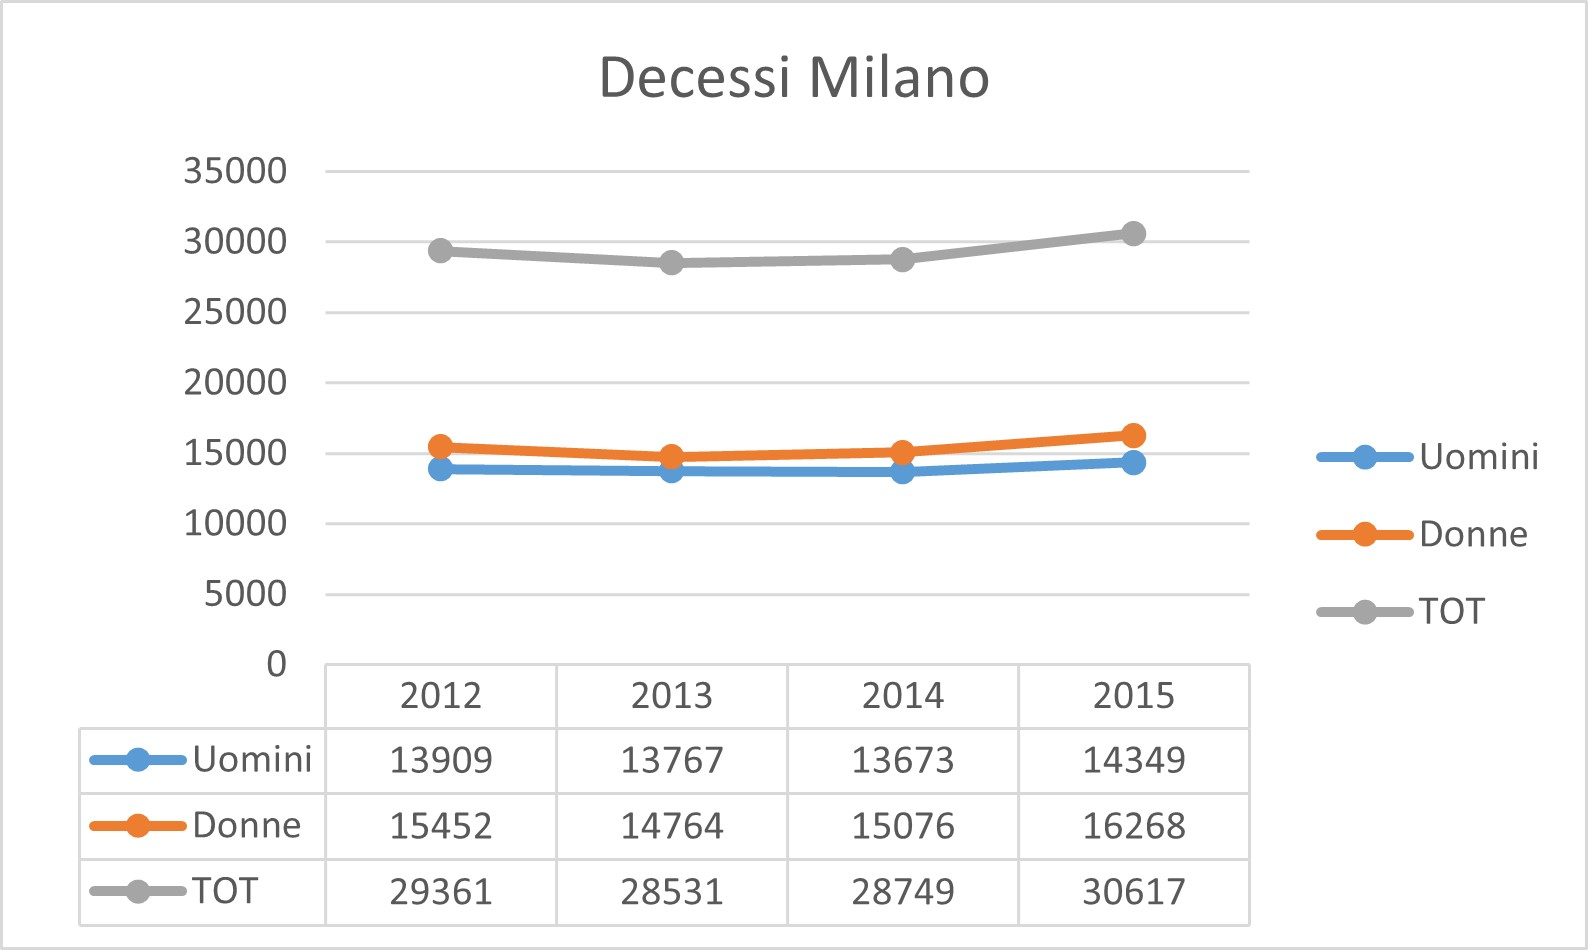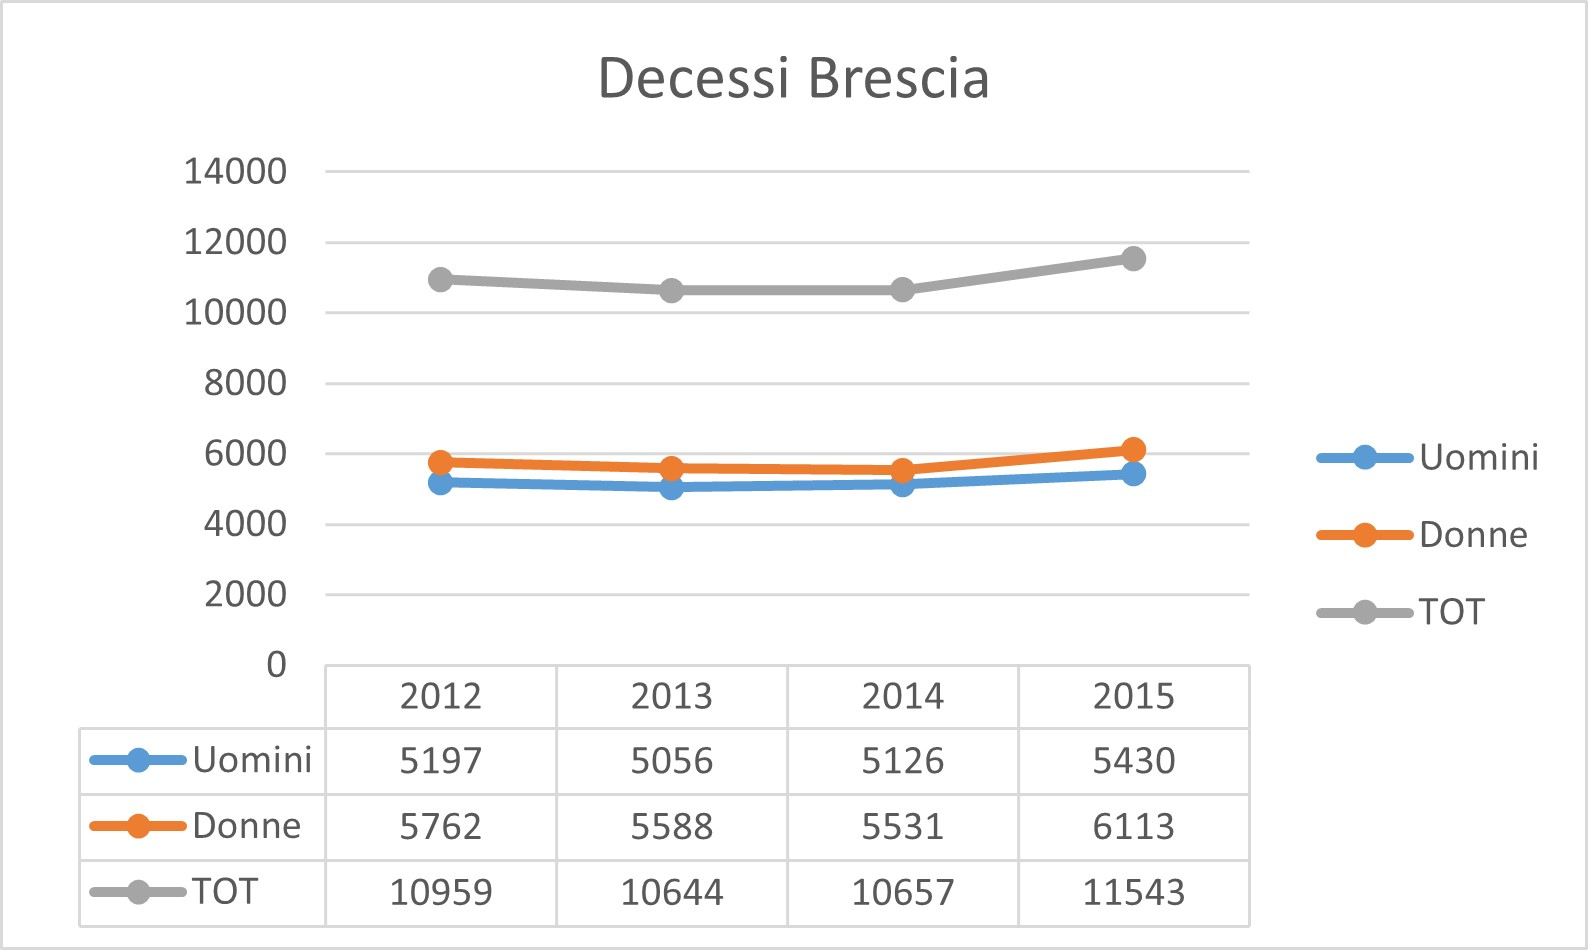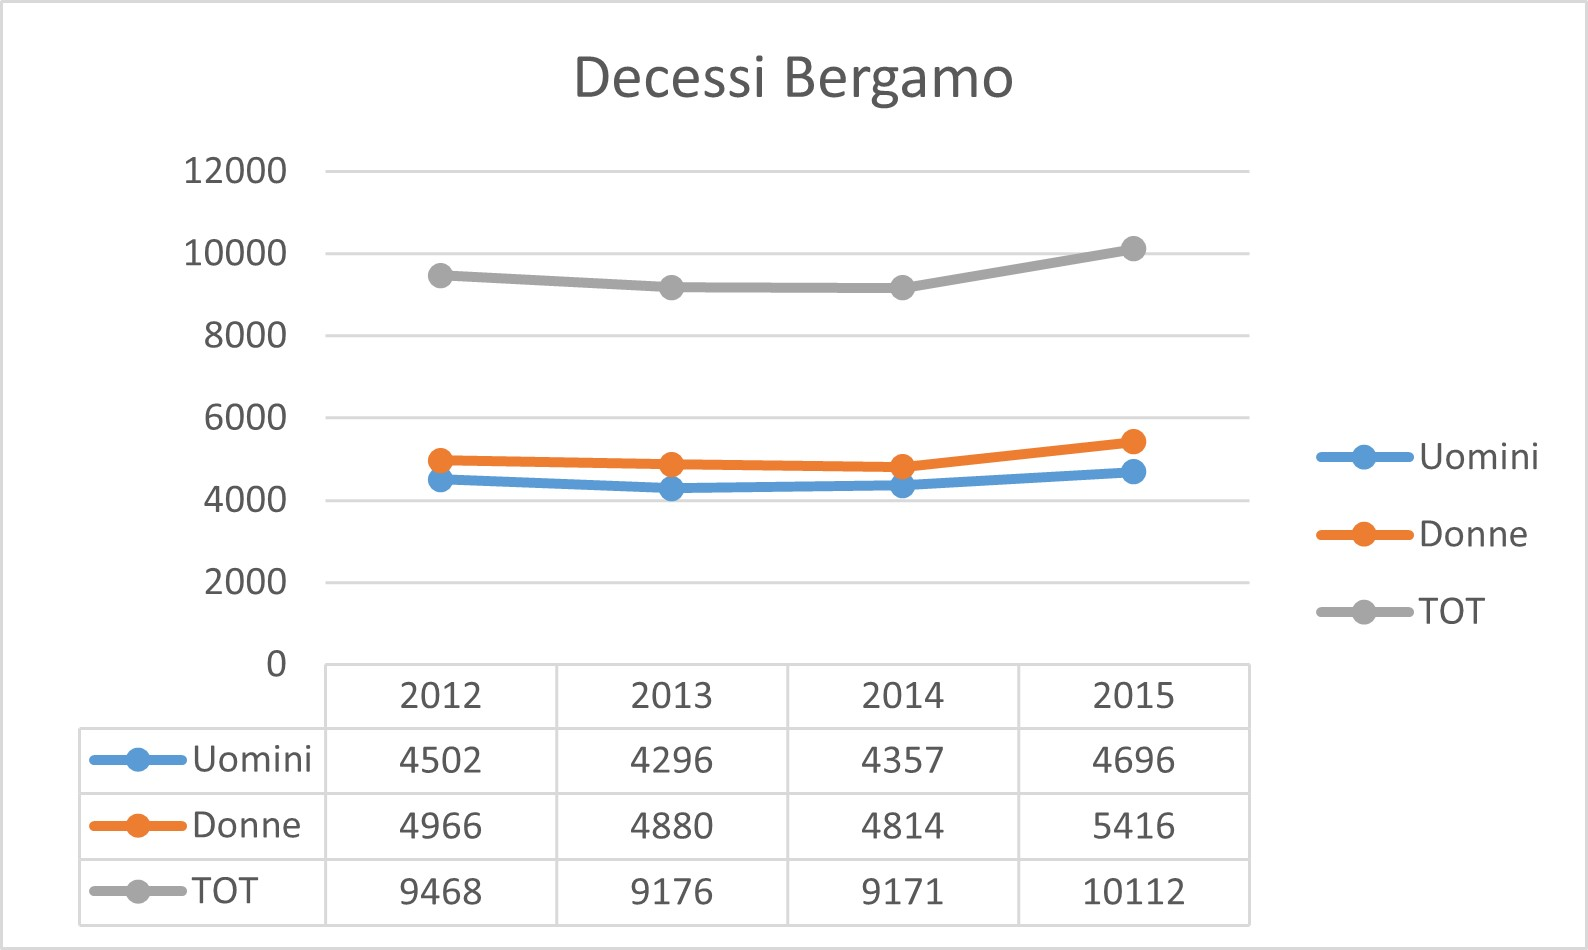

In [ ]:
gruppomorte=["Tumori", "Cause esterne di traumatismo e avvelenamento", "Malattie del sistema circolatorio",
             "Malattie del sistema respiratorio", "Alcune malattie infettive e parassitarie",
             "Disturbi psichici e comportamentali", "Malattie dell'apparato digerente", "Sintomi, segni, risultati anomali e cause mal definite",
             "Malattie del sistema nervoso e degli organi di senso", "Malattie dell'apparato genitourinario",
             "Malattie del sistema osteomuscolare e del tessuto connettivo", "Malattie endocrine, nutrizionali e metaboliche",
             "Complicazioni della gravidanza, del parto e del puerperio", "Malformazioni congenite ed anomalie cromosomiche",
             "Malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario",
             "Alcune condizioni morbose che hanno origine nel periodo perinatale", "Malattie della cute e del tessuto sottocutaneo"]

print("Nel 2012 in provincia di Milano, queste sono le cause di morte per gli UOMINI e per le DONNE sul totale: \n")
for a in gruppomorte:
  a12_MI_DECmx=a12_MI_DECm[(a12_MI_DECm['GRUPPOMORTE']==a)]
  a12_MI_DECfx=a12_MI_DECf[(a12_MI_DECf['GRUPPOMORTE']==a)]
  print("Per il gruppo:", a, "-->l'incidenza sul totale (UOMINI) è stata", round((a12_MI_DECmx.DECESSI.sum()/a12_MI_DECm.DECESSI.sum())*100,2), "%\n mentre per le DONNE è stata", round((a12_MI_DECfx.DECESSI.sum()/a12_MI_DECf.DECESSI.sum())*100,2))

print("\n")
print("Nel 2013:\n")
for a in gruppomorte:
  a13_MI_DECmx=a13_MI_DECm[(a13_MI_DECm['GRUPPOMORTE']==a)]
  a13_MI_DECfx=a13_MI_DECf[(a13_MI_DECf['GRUPPOMORTE']==a)]
  print("Per il gruppo:", a, "-->l'incidenza sul totale (UOMINI) è stata", round((a13_MI_DECmx.DECESSI.sum()/a13_MI_DECm.DECESSI.sum())*100,2), "%\n mentre per le DONNE è stata", round((a13_MI_DECfx.DECESSI.sum()/a13_MI_DECf.DECESSI.sum())*100,2))

print("\n")
print("Nel 2014:\n")
for a in gruppomorte:
  a14_MI_DECmx=a14_MI_DECm[(a14_MI_DECm['GRUPPOMORTE']==a)]
  a14_MI_DECfx=a14_MI_DECf[(a14_MI_DECf['GRUPPOMORTE']==a)]
  print("Per il gruppo:", a, "-->l'incidenzasul totale (UOMINI) è stata", round((a14_MI_DECmx.DECESSI.sum()/a14_MI_DECm.DECESSI.sum())*100,2), "%\n mentre per le DONNE è stata", round((a14_MI_DECfx.DECESSI.sum()/a14_MI_DECf.DECESSI.sum())*100,2))

print("\n")
print("Nel 2015: \n")
for a in gruppomorte:
  a15_MI_DECmx=a15_MI_DECm[(a15_MI_DECm['GRUPPOMORTE']==a)]
  a15_MI_DECfx=a15_MI_DECf[(a15_MI_DECf['GRUPPOMORTE']==a)]
  print("Per il gruppo:", a, "-->l'incidenzasul totale (UOMINI) è stata", round((a15_MI_DECmx.DECESSI.sum()/a15_MI_DECm.DECESSI.sum())*100,2), "%\n mentre per le DONNE è stata", round((a15_MI_DECfx.DECESSI.sum()/a15_MI_DECf.DECESSI.sum())*100,2))


In [ ]:
gruppomorte=["Tumori", "Cause esterne di traumatismo e avvelenamento", "Malattie del sistema circolatorio",
             "Malattie del sistema respiratorio", "Alcune malattie infettive e parassitarie",
             "Disturbi psichici e comportamentali", "Malattie dell'apparato digerente", "Sintomi, segni, risultati anomali e cause mal definite",
             "Malattie del sistema nervoso e degli organi di senso", "Malattie dell'apparato genitourinario",
             "Malattie del sistema osteomuscolare e del tessuto connettivo", "Malattie endocrine, nutrizionali e metaboliche",
             "Complicazioni della gravidanza, del parto e del puerperio", "Malformazioni congenite ed anomalie cromosomiche",
             "Malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario",
             "Alcune condizioni morbose che hanno origine nel periodo perinatale", "Malattie della cute e del tessuto sottocutaneo"]

print("Nel 2012 in provincia di Brescia, queste sono le cause di morte per gli UOMINI e per le DONNE sul totale: \n")
for a in gruppomorte:
  a12_BRE_DECmx=a12_BRE_DECm[(a12_BRE_DECm['GRUPPOMORTE']==a)]
  a12_BRE_DECfx=a12_BRE_DECf[(a12_BRE_DECf['GRUPPOMORTE']==a)]
  print("Per il gruppo:", a, "-->l'incidenza sul totale (UOMINI) è stata", round((a12_BRE_DECmx.DECESSI.sum()/a12_BRE_DECm.DECESSI.sum())*100,2), "%\n mentre per le DONNE è stata", round((a12_BRE_DECfx.DECESSI.sum()/a12_BRE_DECf.DECESSI.sum())*100,2))

print("\n")
print("Nel 2013:\n")
for a in gruppomorte:
  a13_BRE_DECmx=a13_BRE_DECm[(a13_BRE_DECm['GRUPPOMORTE']==a)]
  a13_BRE_DECfx=a13_BRE_DECf[(a13_BRE_DECf['GRUPPOMORTE']==a)]
  print("Per il gruppo:", a, "-->l'incidenza sul totale (UOMINI) è stata", round((a13_BRE_DECmx.DECESSI.sum()/a13_BRE_DECm.DECESSI.sum())*100,2), "%\n mentre per le DONNE è stata", round((a13_BRE_DECfx.DECESSI.sum()/a13_BRE_DECf.DECESSI.sum())*100,2))

print("\n")
print("Nel 2014:\n")
for a in gruppomorte:
  a14_BRE_DECmx=a14_BRE_DECm[(a14_BRE_DECm['GRUPPOMORTE']==a)]
  a14_BRE_DECfx=a14_BRE_DECf[(a14_BRE_DECf['GRUPPOMORTE']==a)]
  print("Per il gruppo:", a, "-->l'incidenzasul totale (UOMINI) è stata", round((a14_BRE_DECmx.DECESSI.sum()/a14_BRE_DECm.DECESSI.sum())*100,2), "%\n mentre per le DONNE è stata", round((a14_BRE_DECfx.DECESSI.sum()/a14_BRE_DECf.DECESSI.sum())*100,2))

print("\n")
print("Nel 2015: \n")
for a in gruppomorte:
  a15_BRE_DECmx=a15_BRE_DECm[(a15_BRE_DECm['GRUPPOMORTE']==a)]
  a15_BRE_DECfx=a15_BRE_DECf[(a15_BRE_DECf['GRUPPOMORTE']==a)]
  print("Per il gruppo:", a, "-->l'incidenzasul totale (UOMINI) è stata", round((a15_BRE_DECmx.DECESSI.sum()/a15_BRE_DECm.DECESSI.sum())*100,2), "%\n mentre per le DONNE è stata", round((a15_BRE_DECfx.DECESSI.sum()/a15_BRE_DECf.DECESSI.sum())*100,2))


Nel 2012 in provincia di Brescia, queste sono le cause di morte per gli UOMINI e per le DONNE sul totale: 

Per il gruppo: Tumori -->l'incidenza sul totale (UOMINI) è stata 39.35 %
 mentre per le DONNE è stata 29.12
Per il gruppo: Cause esterne di traumatismo e avvelenamento -->l'incidenza sul totale (UOMINI) è stata 4.91 %
 mentre per le DONNE è stata 2.57
Per il gruppo: Malattie del sistema circolatorio -->l'incidenza sul totale (UOMINI) è stata 30.15 %
 mentre per le DONNE è stata 38.01
Per il gruppo: Malattie del sistema respiratorio -->l'incidenza sul totale (UOMINI) è stata 8.2 %
 mentre per le DONNE è stata 6.96
Per il gruppo: Alcune malattie infettive e parassitarie -->l'incidenza sul totale (UOMINI) è stata 2.23 %
 mentre per le DONNE è stata 2.48
Per il gruppo: Disturbi psichici e comportamentali -->l'incidenza sul totale (UOMINI) è stata 1.67 %
 mentre per le DONNE è stata 3.59
Per il gruppo: Malattie dell'apparato digerente -->l'incidenza sul totale (UOMINI) è stata 3.41 %


In [ ]:
gruppomorte=["Tumori", "Cause esterne di traumatismo e avvelenamento", "Malattie del sistema circolatorio",
             "Malattie del sistema respiratorio", "Alcune malattie infettive e parassitarie",
             "Disturbi psichici e comportamentali", "Malattie dell'apparato digerente", "Sintomi, segni, risultati anomali e cause mal definite",
             "Malattie del sistema nervoso e degli organi di senso", "Malattie dell'apparato genitourinario",
             "Malattie del sistema osteomuscolare e del tessuto connettivo", "Malattie endocrine, nutrizionali e metaboliche",
             "Complicazioni della gravidanza, del parto e del puerperio", "Malformazioni congenite ed anomalie cromosomiche",
             "Malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario",
             "Alcune condizioni morbose che hanno origine nel periodo perinatale", "Malattie della cute e del tessuto sottocutaneo"]

print("Nel 2012 in provincia di Brescia, queste sono le cause di morte per gli UOMINI e per le DONNE sul totale: \n")
for a in gruppomorte:
  a12_BER_DECmx=a12_BER_DECm[(a12_BER_DECm['GRUPPOMORTE']==a)]
  a12_BER_DECfx=a12_BER_DECf[(a12_BER_DECf['GRUPPOMORTE']==a)]
  print("Per il gruppo:", a, "-->l'incidenza sul totale (UOMINI) è stata", round((a12_BER_DECmx.DECESSI.sum()/a12_BER_DECm.DECESSI.sum())*100,2), "%\n mentre per le DONNE è stata", round((a12_BER_DECfx.DECESSI.sum()/a12_BER_DECf.DECESSI.sum())*100,2))

print("\n")
print("Nel 2013:\n")
for a in gruppomorte:
  a13_BER_DECmx=a13_BER_DECm[(a13_BER_DECm['GRUPPOMORTE']==a)]
  a13_BER_DECfx=a13_BER_DECf[(a13_BER_DECf['GRUPPOMORTE']==a)]
  print("Per il gruppo:", a, "-->l'incidenza sul totale (UOMINI) è stata", round((a13_BER_DECmx.DECESSI.sum()/a13_BER_DECm.DECESSI.sum())*100,2), "%\n mentre per le DONNE è stata", round((a13_BER_DECfx.DECESSI.sum()/a13_BER_DECf.DECESSI.sum())*100,2))

print("\n")
print("Nel 2014:\n")
for a in gruppomorte:
  a14_BER_DECmx=a14_BER_DECm[(a14_BER_DECm['GRUPPOMORTE']==a)]
  a14_BER_DECfx=a14_BER_DECf[(a14_BER_DECf['GRUPPOMORTE']==a)]
  print("Per il gruppo:", a, "-->l'incidenzasul totale (UOMINI) è stata", round((a14_BER_DECmx.DECESSI.sum()/a14_BER_DECm.DECESSI.sum())*100,2), "%\n mentre per le DONNE è stata", round((a14_BER_DECfx.DECESSI.sum()/a14_BER_DECf.DECESSI.sum())*100,2))

print("\n")
print("Nel 2015: \n")
for a in gruppomorte:
  a15_BER_DECmx=a15_BER_DECm[(a15_BER_DECm['GRUPPOMORTE']==a)]
  a15_BER_DECfx=a15_BER_DECf[(a15_BER_DECf['GRUPPOMORTE']==a)]
  print("Per il gruppo:", a, "-->l'incidenzasul totale (UOMINI) è stata", round((a15_BER_DECmx.DECESSI.sum()/a15_BER_DECm.DECESSI.sum())*100,2), "%\n mentre per le DONNE è stata", round((a15_BER_DECfx.DECESSI.sum()/a15_BER_DECf.DECESSI.sum())*100,2))


Nel 2012 in provincia di Brescia, queste sono le cause di morte per gli UOMINI e per le DONNE sul totale: 

Per il gruppo: Tumori -->l'incidenza sul totale (UOMINI) è stata 39.05 %
 mentre per le DONNE è stata 28.25
Per il gruppo: Cause esterne di traumatismo e avvelenamento -->l'incidenza sul totale (UOMINI) è stata 4.55 %
 mentre per le DONNE è stata 2.58
Per il gruppo: Malattie del sistema circolatorio -->l'incidenza sul totale (UOMINI) è stata 30.36 %
 mentre per le DONNE è stata 37.11
Per il gruppo: Malattie del sistema respiratorio -->l'incidenza sul totale (UOMINI) è stata 7.44 %
 mentre per le DONNE è stata 6.81
Per il gruppo: Alcune malattie infettive e parassitarie -->l'incidenza sul totale (UOMINI) è stata 2.2 %
 mentre per le DONNE è stata 1.93
Per il gruppo: Disturbi psichici e comportamentali -->l'incidenza sul totale (UOMINI) è stata 2.04 %
 mentre per le DONNE è stata 4.51
Per il gruppo: Malattie dell'apparato digerente -->l'incidenza sul totale (UOMINI) è stata 4.0 %
 

Da tutto ciò emerge che nelle tre province più popolose della lombardia le malattie che hanno fatto più vittime sono i tumori per quanto riguarda gli uomini, mentre le malattie del sistema circolatorio per quanto riguarda le donne. Esse rimangono invariate nel tempo.

## Cause morte


Con queste linee di codice scopriamo qual è la singola patologia con più decessi

In [ ]:
print(a12_IT_DECf[a12_IT_DECf['DECESSI']==a12_IT_DECf['DECESSI'].max()])
print("\n")
print(a12_IT_DECm[a12_IT_DECm['DECESSI']==a12_IT_DECm['DECESSI'].max()])
print("\n")
print(a12_RL_DECm[a12_RL_DECm['DECESSI']==a12_RL_DECm['DECESSI'].max()])
print("\n")
print(a12_RL_DECf[a12_RL_DECf['DECESSI']==a12_RL_DECf['DECESSI'].max()])

      ANNO PROVINCIA GENERE                        GRUPPOMORTE  \
6112  2012    ITALIA      F  Malattie del sistema circolatorio   

                     CAUSAMORTE  DECESSI  
6112  malattie cerebrovascolari  37193.0  


     ANNO PROVINCIA GENERE GRUPPOMORTE  \
318  2012    ITALIA      M      Tumori   

                                                                        CAUSAMORTE  \
318  tumori maligni-di cui tumori maligni della trachea, dei bronchi e dei polmoni   

     DECESSI  
318  24805.0  


      ANNO          PROVINCIA GENERE GRUPPOMORTE  \
1264  2012  REGIONE LOMBARDIA      M      Tumori   

                                                                         CAUSAMORTE  \
1264  tumori maligni-di cui tumori maligni della trachea, dei bronchi e dei polmoni   

      DECESSI  
1264   4252.0  


      ANNO          PROVINCIA GENERE                        GRUPPOMORTE  \
5369  2012  REGIONE LOMBARDIA      F  Malattie del sistema circolatorio   

                     CAU

In [ ]:
print(a13_IT_DECm[a13_IT_DECm['DECESSI']==a13_IT_DECm['DECESSI'].max()])
print("\n")
print(a13_IT_DECf[a13_IT_DECf['DECESSI']==a13_IT_DECf['DECESSI'].max()])
print("\n")
print(a13_RL_DECm[a13_RL_DECm['DECESSI']==a13_RL_DECm['DECESSI'].max()])
print("\n")
print(a13_RL_DECf[a13_RL_DECf['DECESSI']==a13_RL_DECf['DECESSI'].max()])

      ANNO PROVINCIA GENERE GRUPPOMORTE  \
3448  2013    ITALIA      M      Tumori   

                                                                         CAUSAMORTE  \
3448  tumori maligni-di cui tumori maligni della trachea, dei bronchi e dei polmoni   

      DECESSI  
3448  24512.0  


      ANNO PROVINCIA GENERE                        GRUPPOMORTE  \
5906  2013    ITALIA      F  Malattie del sistema circolatorio   

                     CAUSAMORTE  DECESSI  
5906  malattie cerebrovascolari  35128.0  


      ANNO          PROVINCIA GENERE GRUPPOMORTE  \
2694  2013  REGIONE LOMBARDIA      M      Tumori   

                                                                         CAUSAMORTE  \
2694  tumori maligni-di cui tumori maligni della trachea, dei bronchi e dei polmoni   

      DECESSI  
2694   4153.0  


      ANNO          PROVINCIA GENERE                        GRUPPOMORTE  \
4985  2013  REGIONE LOMBARDIA      F  Malattie del sistema circolatorio   

                  

In [ ]:
print(a14_IT_DECm[a14_IT_DECm['DECESSI']==a14_IT_DECm['DECESSI'].max()])
print("\n")
print(a14_IT_DECf[a14_IT_DECf['DECESSI']==a14_IT_DECf['DECESSI'].max()])
print("\n")
print(a14_RL_DECm[a14_RL_DECm['DECESSI']==a14_RL_DECm['DECESSI'].max()])
print("\n")
print(a14_RL_DECf[a14_RL_DECf['DECESSI']==a14_RL_DECf['DECESSI'].max()])

     ANNO PROVINCIA GENERE GRUPPOMORTE  \
176  2014    ITALIA      M      Tumori   

                                                                        CAUSAMORTE  \
176  tumori maligni-di cui tumori maligni della trachea, dei bronchi e dei polmoni   

     DECESSI  
176  24088.0  


      ANNO PROVINCIA GENERE                        GRUPPOMORTE  \
5148  2014    ITALIA      F  Malattie del sistema circolatorio   

                     CAUSAMORTE  DECESSI  
5148  malattie cerebrovascolari  34520.0  


      ANNO          PROVINCIA GENERE GRUPPOMORTE  \
1229  2014  REGIONE LOMBARDIA      M      Tumori   

                                                                         CAUSAMORTE  \
1229  tumori maligni-di cui tumori maligni della trachea, dei bronchi e dei polmoni   

      DECESSI  
1229   3981.0  


      ANNO          PROVINCIA GENERE                        GRUPPOMORTE  \
5855  2014  REGIONE LOMBARDIA      F  Malattie del sistema circolatorio   

                     CAU

In [ ]:
a15_IT_DEC[a15_IT_DEC['DECESSI']==a15_IT_DEC['DECESSI'].max()]

,ANNO,PROVINCIA,GENERE,GRUPPOMORTE,CAUSAMORTE,DECESSI
6065,2015,ITALIA,F,Malattie del sistema circolatorio,malattie cerebrovascolari,37330.0


In [ ]:
print(a14_IT_DECm[a14_IT_DECm['DECESSI']==a14_IT_DECm['DECESSI'].max()])
print("\n")
print(a14_IT_DECf[a14_IT_DECf['DECESSI']==a14_IT_DECf['DECESSI'].max()])
print("\n")
print(a14_RL_DECm[a14_RL_DECm['DECESSI']==a14_RL_DECm['DECESSI'].max()])
print("\n")
print(a14_RL_DECf[a14_RL_DECf['DECESSI']==a14_RL_DECf['DECESSI'].max()])
print("\n")
print(a14_MI_DECf[a14_MI_DECf['DECESSI']==a14_MI_DECf['DECESSI'].max()])
print("\n")
print(a14_MI_DECm[a14_MI_DECm['DECESSI']==a14_MI_DECm['DECESSI'].max()])
print("\n")
print(a14_BRE_DECf[a14_BRE_DECf['DECESSI']==a14_BRE_DECf['DECESSI'].max()])
print("\n")
print(a14_BRE_DECm[a14_BRE_DECm['DECESSI']==a14_BRE_DECm['DECESSI'].max()])
print("\n")
print(a14_BER_DECf[a14_BER_DECf['DECESSI']==a14_BER_DECf['DECESSI'].max()])
print("\n")
print(a14_BER_DECm[a14_BER_DECm['DECESSI']==a14_BER_DECm['DECESSI'].max()])

     ANNO PROVINCIA GENERE GRUPPOMORTE  \
176  2014    ITALIA      M      Tumori   

                                                                        CAUSAMORTE  \
176  tumori maligni-di cui tumori maligni della trachea, dei bronchi e dei polmoni   

     DECESSI  
176  24088.0  


      ANNO PROVINCIA GENERE                        GRUPPOMORTE  \
5148  2014    ITALIA      F  Malattie del sistema circolatorio   

                     CAUSAMORTE  DECESSI  
5148  malattie cerebrovascolari  34520.0  


      ANNO          PROVINCIA GENERE GRUPPOMORTE  \
1229  2014  REGIONE LOMBARDIA      M      Tumori   

                                                                         CAUSAMORTE  \
1229  tumori maligni-di cui tumori maligni della trachea, dei bronchi e dei polmoni   

      DECESSI  
1229   3981.0  


      ANNO          PROVINCIA GENERE                        GRUPPOMORTE  \
5855  2014  REGIONE LOMBARDIA      F  Malattie del sistema circolatorio   

                     CAU

Conferma quanto detto prima, le patologie sono sempre le stesse, tumori maligni per gli uomini e malattie cerebrovascolari per le donne

# 2) Dataset Condizioni salute


Questo dataset raccoglie dati dal 2012 al 2016 sulla condizione di salute dei cittadini italiani, lombardi, e per ogni provincia lombarda.

## Speranza di vita

In [ ]:
cond_salute = cond_salute.rename(columns={'SPERANZA DI VITA ALLA NASCITA': 'SPERANZA', "TASSO MORTALITA' PER 1.000 ABITANTI": 'TASSO', 'TASSO MORTALITA INFANTILE PER RESIDENZA PER 1.000 NATI VIVI':'TASSOINF'})
cond_salute=cond_salute.drop(["COORDINATA X"], axis=1)
cond_salute=cond_salute.drop(["COORDINATA Y"], axis=1)
cond_salute=cond_salute.drop(["POSIZIONE"], axis=1)


<Axes: xlabel='ANNO', ylabel='SPERANZA'>

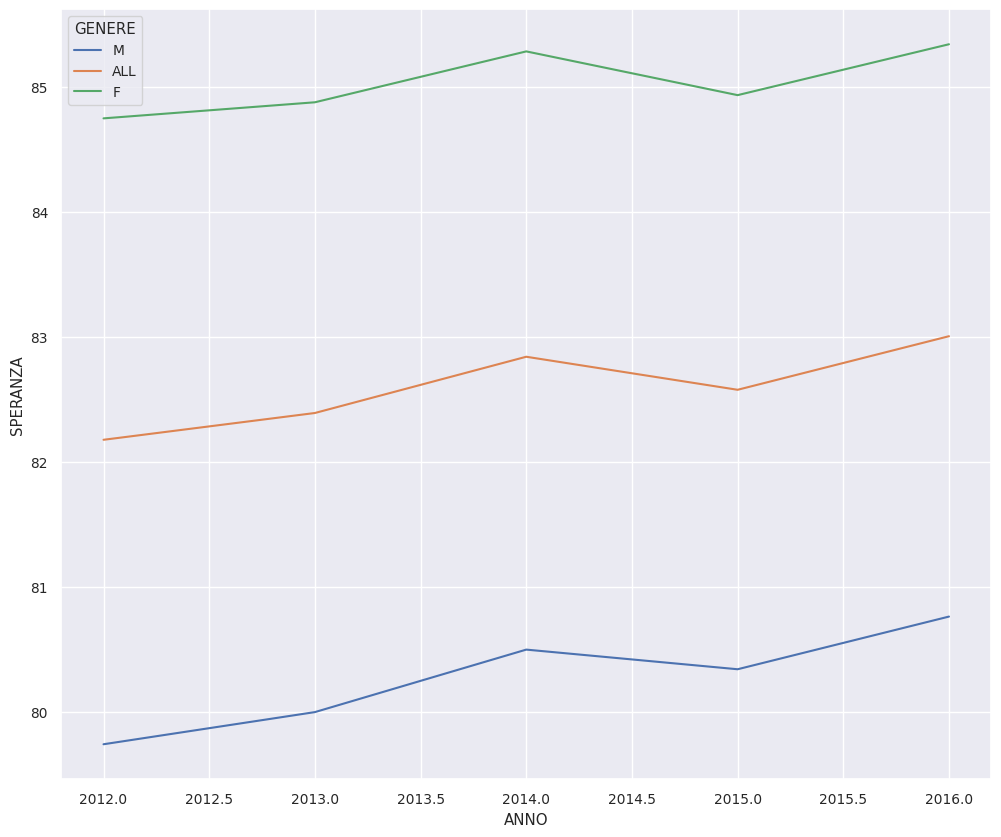

In [ ]:
sns.lineplot(data=cond_salute, x="ANNO", hue="GENERE", y="SPERANZA", errorbar=None)

<Axes: xlabel='ANNO', ylabel='SPERANZA'>

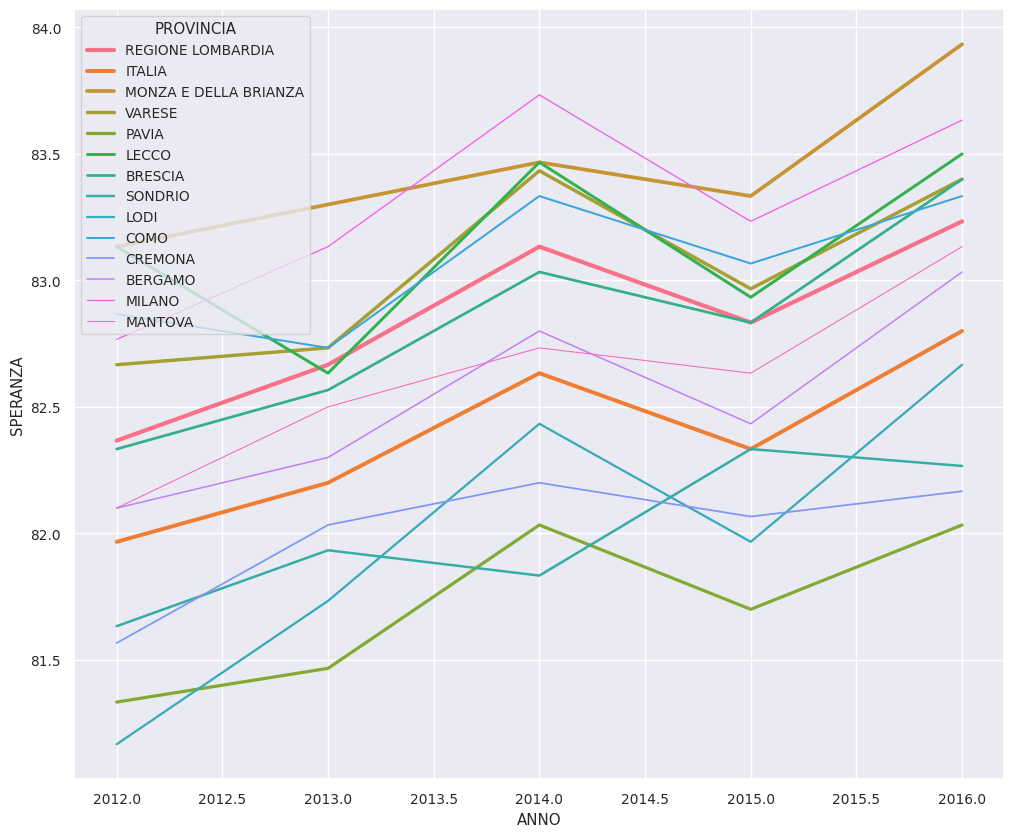

In [ ]:
sns.lineplot(data=cond_salute, x="ANNO", hue="PROVINCIA",y="SPERANZA", errorbar=None, size="PROVINCIA")

In [ ]:
gruppo=cond_salute[(cond_salute['GENERE'] == "ALL")]
gruppo.groupby(['PROVINCIA'])['SPERANZA'].mean()

PROVINCIA
BERGAMO                  82.52
BRESCIA                  82.80
COMO                     83.02
CREMONA                  81.96
ITALIA                   82.36
LECCO                    83.10
LODI                     81.94
MANTOVA                  82.60
MILANO                   83.26
MONZA E DELLA BRIANZA    83.40
PAVIA                    81.68
REGIONE LOMBARDIA        82.80
SONDRIO                  81.96
VARESE                   83.00
Name: SPERANZA, dtype: float64

## Tasso di mortalità

<Axes: xlabel='ANNO', ylabel='TASSO'>

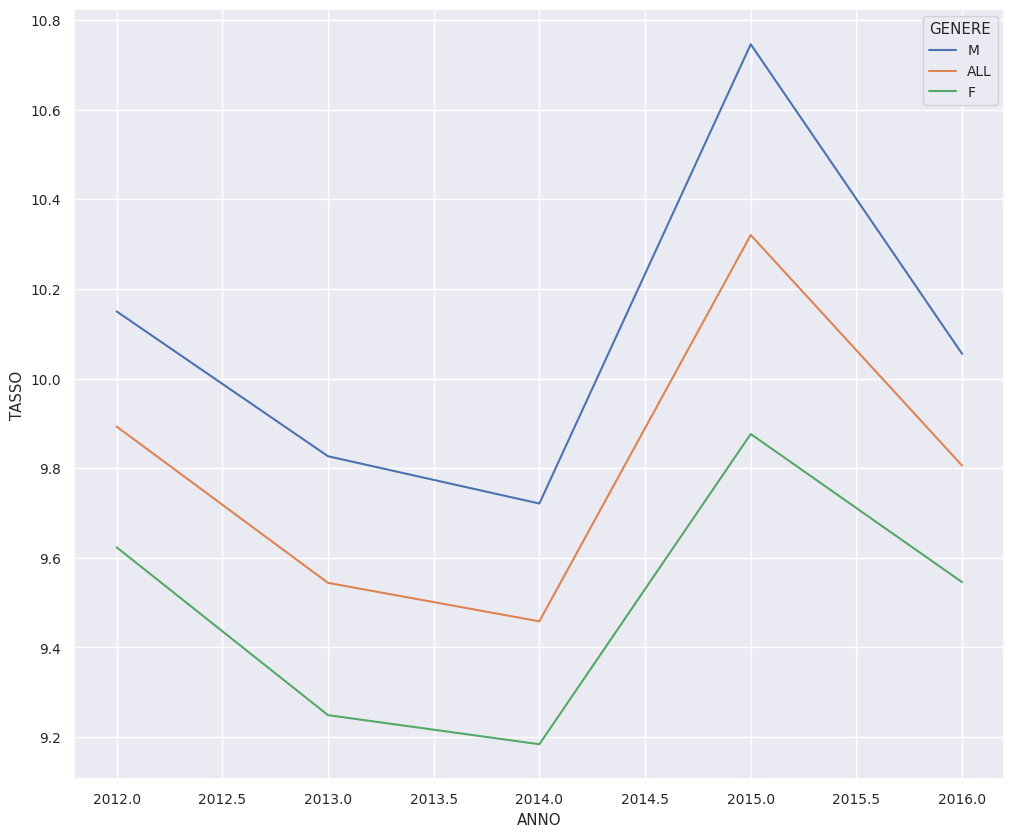

In [ ]:
sns.lineplot(data=cond_salute, x="ANNO", hue="GENERE", y="TASSO", errorbar=None)

<Axes: xlabel='ANNO', ylabel='TASSO'>

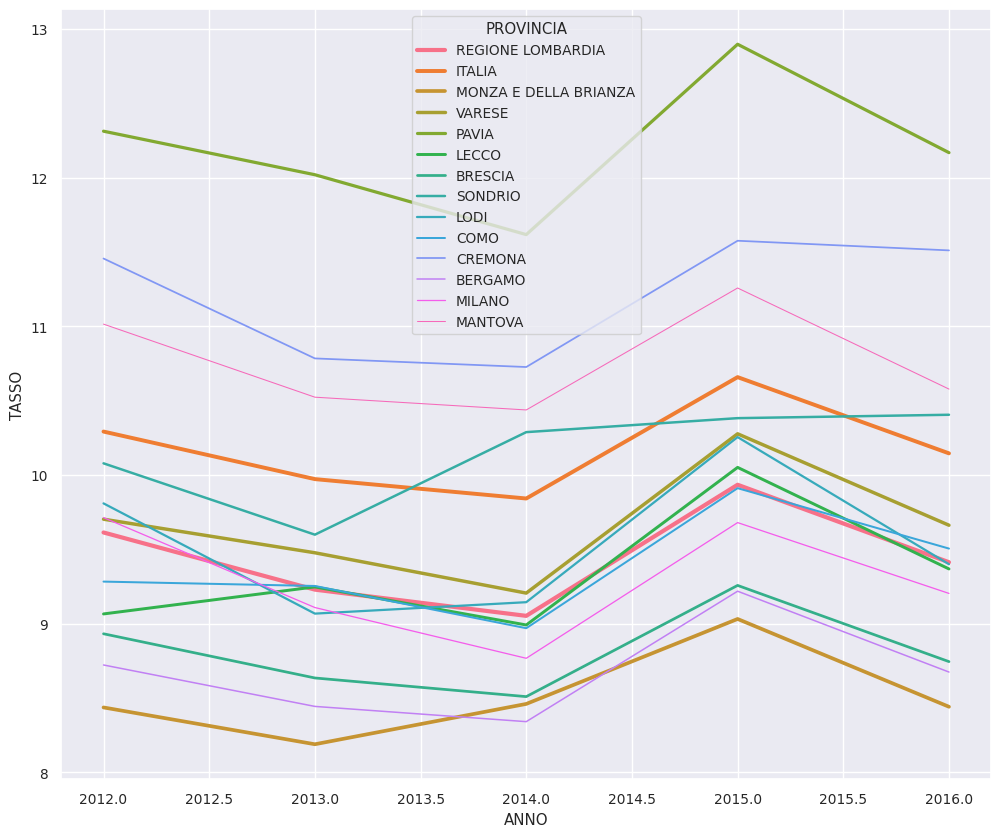

In [ ]:
sns.lineplot(data=cond_salute, x="ANNO", hue="PROVINCIA", y="TASSO", errorbar=None, size="PROVINCIA")

## Tasso mortalità infantile

<Axes: xlabel='ANNO', ylabel='TASSOINF'>

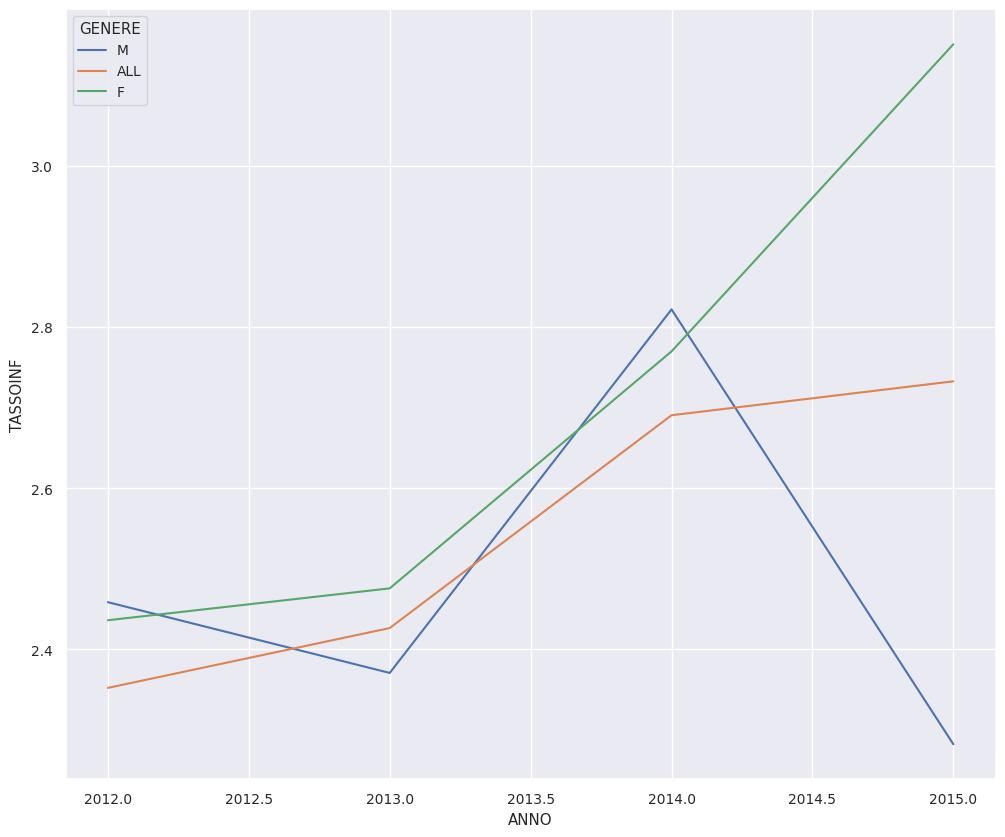

In [ ]:
sns.lineplot(data=cond_salute, x="ANNO", hue="GENERE", y="TASSOINF", errorbar=None)

In [ ]:
gruppo1=cond_salute[(cond_salute['GENERE'] == "M")]
gruppo1.groupby(['ANNO'])['TASSOINF'].mean()


ANNO
2012    2.458571
2013    2.370714
2014    2.822143
2015    2.282143
2016         NaN
Name: TASSOINF, dtype: float64

In [ ]:
gruppo2=cond_salute[(cond_salute['GENERE'] == "F")]
gruppo2.groupby(['ANNO'])['TASSOINF'].mean()

ANNO
2012    2.436154
2013    2.475714
2014    2.770000
2015    3.151429
2016         NaN
Name: TASSOINF, dtype: float64

In [ ]:
gruppo3=cond_salute[(cond_salute['GENERE'] == "ALL")]
gruppo3.groupby(['PROVINCIA'])['TASSOINF'].mean()

PROVINCIA
BERGAMO                  3.0650
BRESCIA                  3.2950
COMO                     2.4825
CREMONA                  3.7875
ITALIA                   2.9100
LECCO                    2.6650
LODI                     1.8250
MANTOVA                  2.6475
MILANO                   2.3675
MONZA E DELLA BRIANZA    2.1175
PAVIA                    2.0850
REGIONE LOMBARDIA        2.5700
SONDRIO                  1.6900
VARESE                   2.2000
Name: TASSOINF, dtype: float64

<Axes: xlabel='ANNO', ylabel='TASSOINF'>

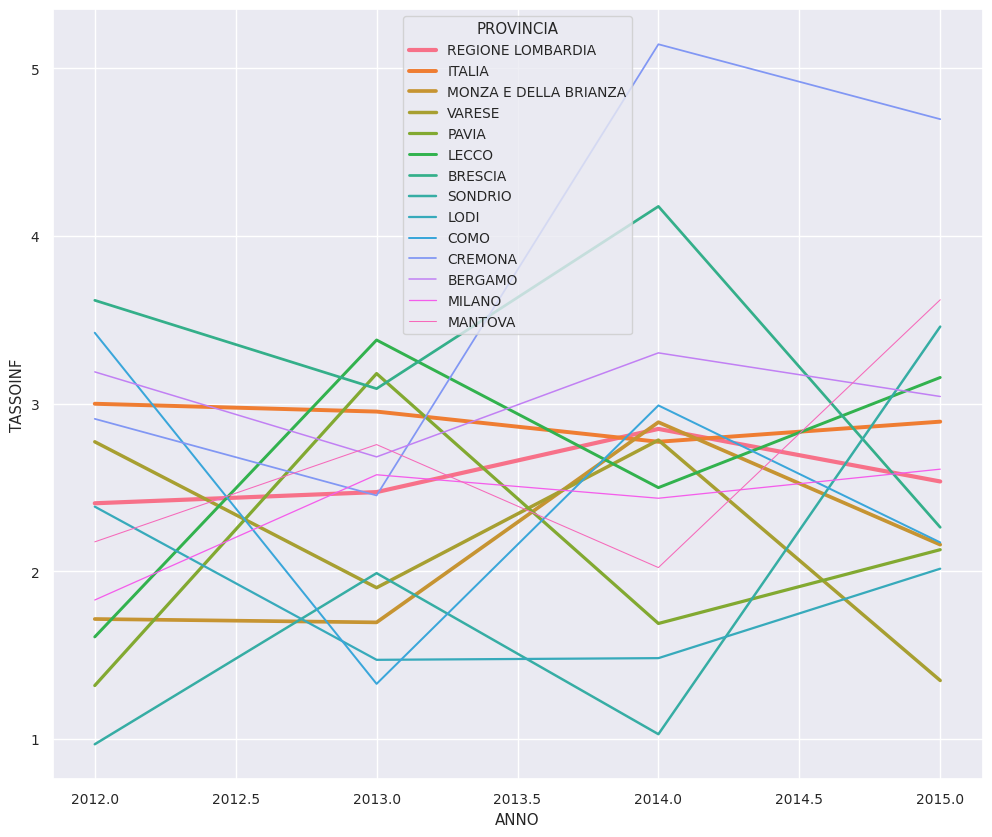

In [ ]:
sns.lineplot(data=cond_salute, x="ANNO", hue="PROVINCIA", y="TASSOINF", errorbar=None, size="PROVINCIA")

# 3) Malattie infettive

questo dataset raccoglie i dati dal 2008 al 2018, descrive le malattie infettive

In [ ]:
infettive=infettive.drop(["Tasso Età-Sesso (x100'000)"], axis=1)
infettive=infettive.drop(["Tasso Regione(x 100000)"], axis=1)
infettive=infettive.drop(["Tasso Regione(x 100000) 1"], axis=1)
infettive=infettive.drop(["Tasso"], axis=1)
infettive=infettive.drop(["VACCINO"], axis=1)


In [ ]:
infettive = infettive.rename(columns={'CLASSIFICAZIONE da REPORT': 'Classe', "Inizio Sintomi Anno": 'Inizio', 'Numero Pratiche':'NumPratiche', 'Popolazione Residente': 'Popolazione',
                                      'Età Classe': 'Età'})

In [ ]:
infettive.drop(infettive.loc[infettive['Sesso']=='?'].index, inplace=True)
infettive.drop(infettive.loc[infettive['Sesso']=='Tutti'].index, inplace=True)
infettive.drop(infettive.loc[infettive['Età']=='Tutti'].index, inplace=True)

Il dataset contiene gli stessi dati ripetuti più volte, per evitarlo, abbiamo eliminato i dati aggregati raggruppati per sesso e età sotto la categoria "tutti"

In [ ]:
data = infettive.groupby(['Classe',"Inizio"], as_index=False)['NumPratiche'].sum()

<Axes: xlabel='Inizio', ylabel='NumPratiche'>

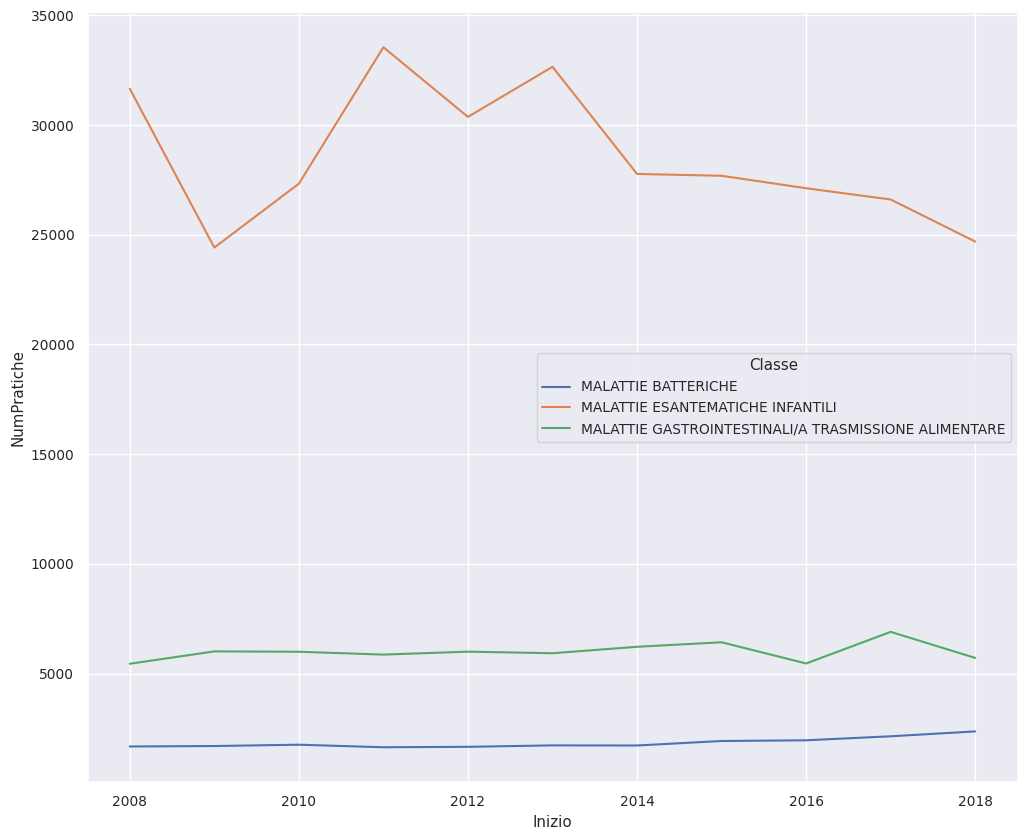

In [ ]:
sns.lineplot(data=data, x="Inizio", hue="Classe", y="NumPratiche", errorbar=None)

In [ ]:
data1 = infettive.groupby(['Classe',"Inizio"], as_index=False)['NumPratiche'].sum()

In [ ]:
infettiveH.groupby(['Classe'])['NumPratiche'].sum()

Classe
MALATTIE BATTERICHE                                      20413
MALATTIE ESANTEMICHE INFANTILI                          321048
MALATTIE GASTROINTESTINALI/A TRASMISSIONE ALIMENTARE     66787
Name: NumPratiche, dtype: int64

In [ ]:
infettive[infettive['NumPratiche']==infettive['NumPratiche'].max()]

,Classe,Patologia,Inizio,Sesso,Età,NumPratiche,Popolazione
10041,MALATTIE ESANTEMATICHE INFANTILI,VARICELLA,2011,M,00-04,8707,253318


In [ ]:
inf_m=infettive[(infettive['Sesso'] == "M")]
inf_f=infettive[(infettive['Sesso'] == "F")]
inf_m[inf_m['NumPratiche']==inf_m['NumPratiche'].max()]

,Classe,VACCINO,Patologia,Inizio,Sesso,Età,NumPratiche,Popolazione,Tasso Età-Sesso (x100'000),Tasso Regione(x 100000),Tasso Regione(x 100000) 1,Tasso
11398,MALATTIE ESANTEMICHE INFANTILI,Patologia Coperta da Vaccino,VARICELLA,2011,M,Tutti,12714,4844524,0.0,262.44,262.44,262.44


In [ ]:
inf_f[inf_f['NumPratiche']==inf_f['NumPratiche'].max()]

,Classe,VACCINO,Patologia,Inizio,Sesso,Età,NumPratiche,Popolazione,Tasso Età-Sesso (x100'000),Tasso Regione(x 100000),Tasso Regione(x 100000) 1,Tasso
11387,MALATTIE ESANTEMICHE INFANTILI,Patologia Coperta da Vaccino,VARICELLA,2011,F,Tutti,11684,5073190,0.0,230.31,230.31,230.31


In [ ]:
data = infettive.groupby(['Patologia',"Inizio"], as_index=False)['NumPratiche'].sum()

<Axes: xlabel='Inizio', ylabel='NumPratiche'>

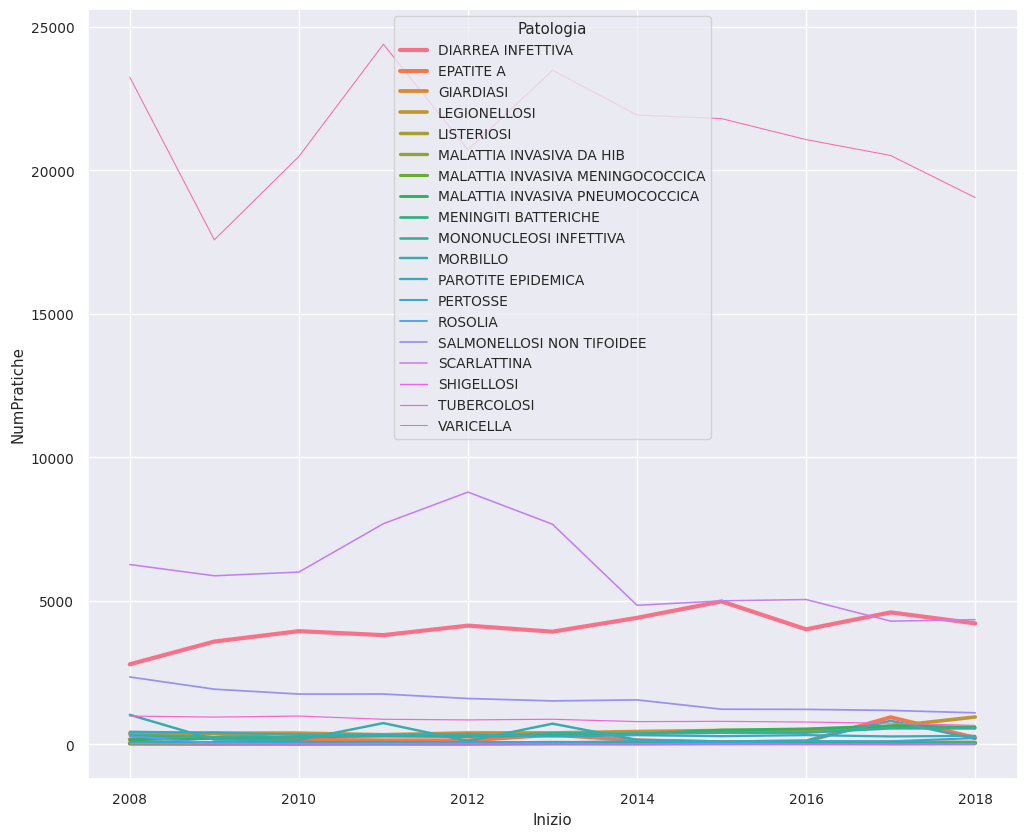

In [ ]:
sns.lineplot(data=data, x="Inizio", hue="Patologia", y="NumPratiche", errorbar=None, size="Patologia")

In [ ]:
infettive.groupby(['Età'])['NumPratiche'].max()

Età
00-04    8707
05-09    3267
10-14     362
15-19     120
20-24     114
25-29     172
30-34     199
35-39     215
40-44     125
45-49     107
50-54      71
55-59      63
60-64      69
65-69     107
70-74     152
75-79     239
80-84     379
Da 85     583
Name: NumPratiche, dtype: int64

In [ ]:
eta= {"bambini":0, "ragazzi": 1, "adulti":2, "anziani" :3}     #maschio e femmina diventano 0 e 1 e così tutto a seguire
infettive['Età']= infettive['Età'].replace(['00-04', '05-09', '10-14'], 'bambini')
infettive['Età']=infettive['Età'].replace(['15-19', '20-24', '25-29'], 'ragazzi')
infettive['Età']=infettive['Età'].replace(['30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64'], 'adulti')
infettive['Età']=infettive['Età'].replace(['65-69', '70-74', '75-79', '80-84', 'Da 85'], 'anziani')
infettive['Età']=infettive['Età'].map(eta)

In [ ]:
infettive

,Classe,Patologia,Inizio,Sesso,Età,NumPratiche,Popolazione
18,MALATTIE GASTROINTESTINALI/A TRASMISSIONE ALIMENTARE,EPATITE A,2018,F,0,2,204801
19,MALATTIE GASTROINTESTINALI/A TRASMISSIONE ALIMENTARE,EPATITE A,2018,F,0,19,233829
20,MALATTIE GASTROINTESTINALI/A TRASMISSIONE ALIMENTARE,EPATITE A,2018,F,0,21,234070
21,MALATTIE GASTROINTESTINALI/A TRASMISSIONE ALIMENTARE,EPATITE A,2018,F,1,6,224886
22,MALATTIE GASTROINTESTINALI/A TRASMISSIONE ALIMENTARE,EPATITE A,2018,F,1,3,222685
23,MALATTIE GASTROINTESTINALI/A TRASMISSIONE ALIMENTARE,EPATITE A,2018,F,1,8,248027
24,MALATTIE GASTROINTESTINALI/A TRASMISSIONE ALIMENTARE,EPATITE A,2018,F,2,1,276331
25,MALATTIE GASTROINTESTINALI/A TRASMISSIONE ALIMENTARE,EPATITE A,2018,F,2,8,318785
26,MALATTIE GASTROINTESTINALI/A TRASMISSIONE ALIMENTARE,EPATITE A,2018,F,2,4,387902
27,MALATTIE GASTROINTESTINALI/A TRASMISSIONE ALIMENTARE,EPATITE A,2018,F,2,3,412848


In [ ]:

datb = infettive.groupby(['Patologia', 'Età',"Inizio"], as_index=False)['NumPratiche'].sum()

<Axes: xlabel='Età', ylabel='NumPratiche'>

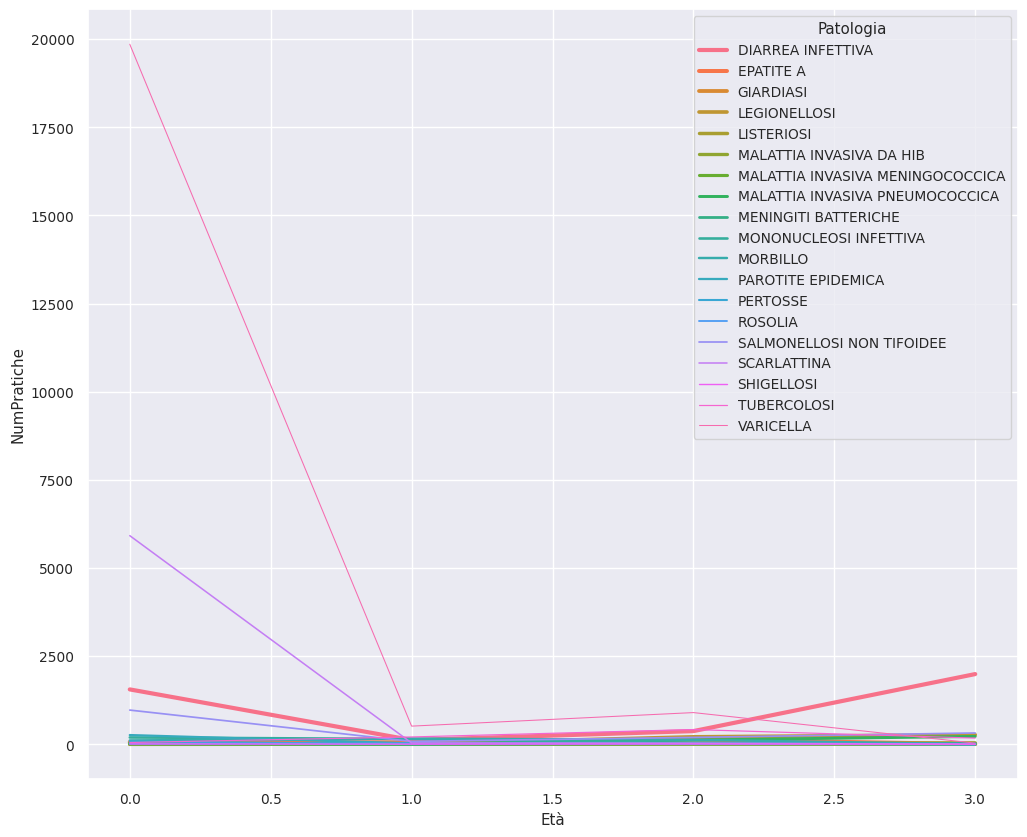

In [ ]:
sns.lineplot(data=datb, x="Età", hue="Patologia", y="NumPratiche", errorbar=None, size="Patologia")

<Axes: xlabel='Età', ylabel='NumPratiche'>

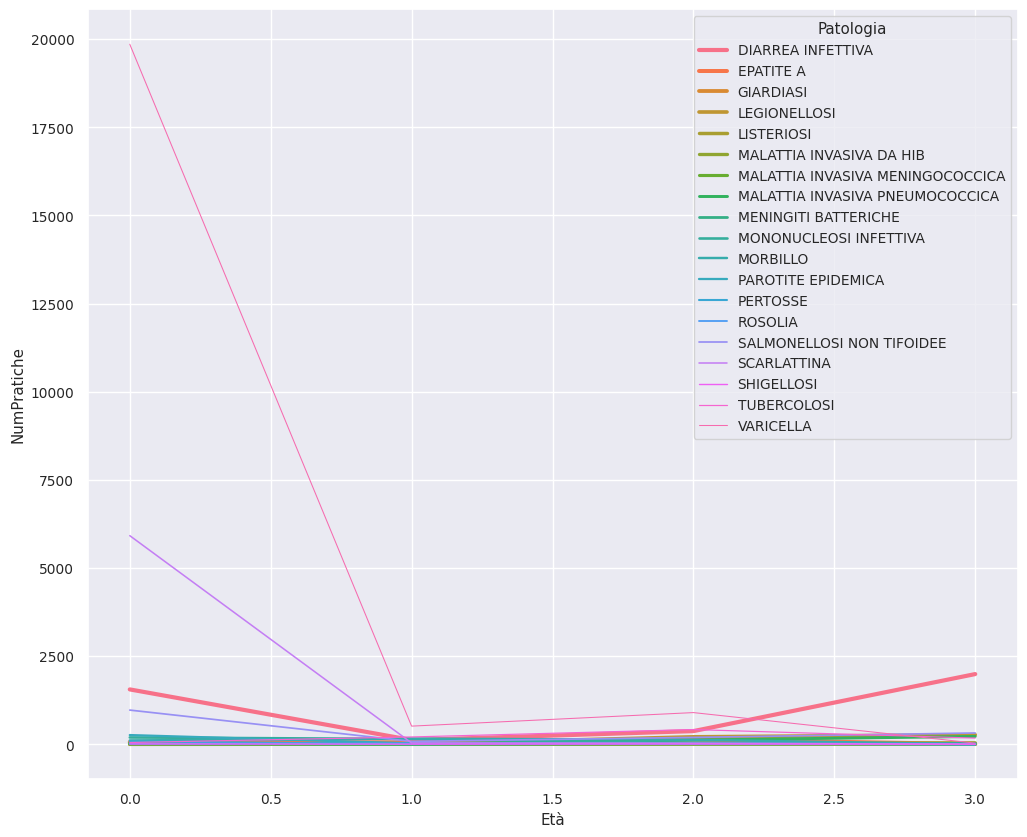

In [ ]:
sns.lineplot(data=datb, x="Età", hue="Patologia", y="NumPratiche", errorbar=None, size="Patologia")

Abbiamo rimappato gli intervalli di età in 4 macro gruppi: Bambini 0, ragazzi 1 , adulti 2 e anziani 3; allo scopo di produrre un grafico che mostri la distribuzione dei contagi per le fasce di età.